# Data, Function, and Library Consolidation

## Import Libraries used in notebook

In [1]:
import pandas as pd # For working with dataframes
import numpy as np # For working with numpy arrays
from sklearn import decomposition # For performing PCA on the data
from sklearn.model_selection import train_test_split #Data splitting
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier for training
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt # For plotting visualizations of analysis
import altair as alt # For additional plotting functionality
import plotly.express as px # For additional plotting
import seaborn as sns # Additional scientific programming
import warnings # Suppress warnings from output
from sklearn.multioutput import MultiOutputClassifier #For prediction into multiple categories
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #Assessing the model
from sklearn.pipeline import Pipeline #Create a pipeline of all of the data processing steps
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm  # Import tqdm for progress tracking
import ptitprince as pt # For raincloud plot
from matplotlib_venn import venn3 # Venn Diagram

## Define Functions

In [2]:
def finetuning_1D(param, min_param, max_param, incre_param, param_2, param_2_value, X_train, y_train, X_val, y_val):
    # Define ranges for n_estimators
    param_range = range(min_param, max_param, incre_param)  # E.g., from 10 to 600 trees
    
    # Initialize lists to store errors
    train_errors = []
    val_errors = []
    
    # Fine-tune n_estimators
    for n in param_range:
        rfclass_test = RandomForestClassifier(random_state=42)
        # Dynamically set the parameter using setattr
        setattr(rfclass_test, param, n)  # Set the parameter (e.g. n_estimators, max_depth, etc.)
        setattr(rfclass_test, param_2, param_2_value)  # Set the parameter (e.g. n_estimators, max_depth, etc.)
        
        model_test = MultiOutputClassifier(rfclass_test)
        
        # Train the model
        model_test.fit(X_train, y_train)
        
        # Predict on training data
        train_preds = model_test.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_preds)
        train_errors.append(1 - train_accuracy)  # Store the training error (1 - accuracy)
        
        # Predict on validation data
        val_preds = model_test.predict(X_val)
        val_accuracy = accuracy_score(y_val, val_preds)
        val_errors.append(1 - val_accuracy)  # Store the validation error (1 - accuracy)
    
    # Plot training and validation errors
    plt.figure(figsize=(12, 6))
    plt.plot(param_range, train_errors, label='Training Error', marker='o')
    plt.plot(param_range, val_errors, label='Validation Error', marker='o')
    plt.title(f'Training and Validation Errors vs. {param}')
    plt.xlabel(f'Number of {param}')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.grid()
    plt.xticks(param_range)  # Ensure every tick to be shown
    plt.show()


def finetuning_2D(param_1, min_param_1, max_param_1, incre_param_1, param_2, min_param_2, max_param_2, incre_param_2, X_train, y_train, X_val, y_val):
    param_1_range = range(min_param_1, max_param_1, incre_param_1)  # E.g., from 10 to 600 trees
    param_2_range = range(min_param_2, max_param_2, incre_param_2)  # E.g., from 1 to 20
    
    # Initialize 2D arrays to store errors
    train_errors = np.zeros((len(param_1_range), len(param_2_range)))
    val_errors = np.zeros((len(param_1_range), len(param_2_range)))
    
    # Iterate over n_estimators with progress tracking
    for i, n in tqdm(enumerate(param_1_range), total=len(param_1_range), desc="Processing n_estimators"):
        for j, md in tqdm(enumerate(param_2_range), total=len(param_2_range), desc="Processing max_depth", leave=False):
            rfclass_test_2D = RandomForestClassifier(random_state=42)
            # Dynamically set the parameter using setattr
            setattr(rfclass_test_2D, param_1, n)  # Set the parameter (e.g. n_estimators, max_depth, etc.)
            setattr(rfclass_test_2D, param_2, md)  # Set the parameter (e.g. n_estimators, max_depth, etc.)
            model_test_2D = MultiOutputClassifier(rfclass_test_2D)
            
            # Train the model
            model_test_2D.fit(X_train, y_train)
    
            # Predict on training data
            train_preds = model_test_2D.predict(X_train)
            train_accuracy = accuracy_score(y_train, train_preds)
            train_errors[i, j] = 1 - train_accuracy  # Store the training error (1 - accuracy)
    
            # Predict on validation data
            val_preds = model_test_2D.predict(X_val)
            val_accuracy = accuracy_score(y_val, val_preds)
            val_errors[i, j] = 1 - val_accuracy  # Store the validation error (1 - accuracy)
    # Plotting the heatmaps
    plt.figure(figsize=(14, 6))
    
    # Heatmap for Training Error
    plt.subplot(1, 2, 1)
    heatmap_train = sns.heatmap(train_errors, 
                                 xticklabels=param_2_range, 
                                 yticklabels=param_1_range, 
                                 cmap='YlGnBu', 
                                 annot=False)  # Store the heatmap for the training error
    plt.title('Training Error Heatmap')
    plt.xlabel(f'{param_2}')
    plt.ylabel(f'{param_1}')
    #plt.colorbar(heatmap_train.collections[0], label='Error Rate')  # Use the first collection for colorbar
    
    # Heatmap for Validation Error
    plt.subplot(1, 2, 2)
    heatmap_val = sns.heatmap(val_errors, 
                               xticklabels=param_2_range, 
                               yticklabels=param_1_range, 
                               cmap='YlGnBu', 
                               annot=False)  # Store the heatmap for the validation error
    plt.title('Validation Error Heatmap')
    plt.xlabel(f'{param_2}')
    plt.ylabel(f'{param_1}')
    #plt.colorbar(heatmap_val.collections[0], label='Error Rate')  # Use the first collection for colorbar
    
    plt.tight_layout()
    plt.show()

#target_column = 'Superpopulation name_African Ancestry'  # Replace this with your actual target column name.
def corr_plot(corr_df, target_column):
    # Calculate the correlation matrix
    correlation_matrix = corr_df.corr()
    # Extract correlations with the target column
    target_correlations = correlation_matrix[target_column]#.sort_values(ascending=False)
    # Step to plot the correlations
    plt.figure(figsize=(12, 6))
    # Create a bar plot of the correlations
    sns.barplot(x=target_correlations.index, y=target_correlations.values, palette='viridis')
    # Add titles and labels
    plt.title(f'Correlation of Features with {target_column}', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Correlation', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.axhline(0, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    # Show plot
    plt.tight_layout()  # Adjust layout
    plt.show()

def occ_plot(occ_df,i,target_ancestry):
    # Step to plot the correlations
    plt.figure(figsize=(12, 6))
    # Create a bar plot of the correlations
    sns.barplot(x=occ_df.columns, y=occ_df.iloc[i], palette='viridis')
    # Add titles and labels
    plt.title(f'Occurance Rate of Features Predictive of {target_ancestry}', fontsize=16)
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Occurance Rate', fontsize=14)
    plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
    plt.axhline(0, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
    # Show plot
    plt.tight_layout()  # Adjust layout
    plt.show()

def calculate_overlap(df):
    overlap_sizes = [0]  # Initialize with 0 at the first row since there's no previous row to compare

    for i in range(1, len(df)):
        current_set = df['Important Feature Set'].iloc[i]
        previous_set = df['Important Feature Set'].iloc[i - 1]
        overlap = len(current_set & previous_set)  # Find intersection size
        overlap_sizes.append(overlap)

    df['Overlap Size'] = overlap_sizes  # Add the overlap sizes to a new column

## Import and look at the snps data for the samples
### Chromosome 22

In [3]:
df_22 = pd.read_csv('matrix_10step.csv')
df_22.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True) #The columns correspond to the specific snp that is present (1) or absent (0)

### Chromosome 15

In [4]:
#df_15 = pd.read_csv('matrix_chr15_10step.csv')
#df_15.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True) #The columns correspond to the specific snp that is present (1) or absent (0)

In [5]:
#df = df_15.merge(df_22, on = ['Sample','Population code'], how = 'inner')
df = df_22

## Import population data

In [6]:
pop_df = pd.read_csv('igsr_populations.tsv', sep='\t')
print(f'Size of df: {pop_df.shape}')
pop_df.head()

Size of df: (212, 11)


,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.13333,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.78000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NaN,BrahminSGDP,Brahmin,Brahmin in India (SGDP),17.70000,83.300000,NaN,South Asia (SGDP),#008c1e,18,Simons Genome Diversity Project
3,NaN,MiaoSGDP,Miao,Miao in China (SGDP),28.00000,109.000000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
4,NaN,KyrgyzSGDP,Kyrgyz,Kyrgyz in Kyrgyzystan (SGDP),42.90000,74.600000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project


# Data Processing Steps

## Data Splitting: Separate data into training, validation, and test sets

In [7]:
train_set, testing_set = train_test_split(df, test_size = 0.3, stratify = df['Population code'], random_state=42) #Specify split state
validation_test, test_set = train_test_split(testing_set, test_size = 0.5, stratify = testing_set['Population code'], random_state=42)
print(train_set.shape)
train_set.head()

(764, 49434)


,Sample,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,...,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533,Population code
427,NA11843,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,CEU
633,NA18939,1,1,1,0,0,0,0,1,0,...,1,2,0,0,1,0,0,0,0,JPT
863,NA19471,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,LWK
540,NA18557,0,0,0,0,2,0,0,0,0,...,0,2,0,0,1,0,0,0,0,CHB
996,NA20504,0,0,0,0,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,TSI


## ----------------Put Aside Test Set, Begin Working with Training & Validation Set ------------------

## Add the demographical data

In [8]:
train_set = train_set.merge(pop_df, on='Population code', how='inner') # Merge the demographical data  to the df with principal component values
print(f'Size of df: {train_set.shape}')

Size of df: (764, 49444)


## Separate the categorical and numerical data

In [9]:
# Select all numerical columns
snps_df = train_set.select_dtypes(include=['number'])
meta_df = train_set.select_dtypes(exclude=['number'])
print(snps_df.shape)
print(meta_df.shape)

(764, 49435)
(764, 9)


## Create Dummies for the **Population** categories using One-Hot Encoding

In [10]:
original_columns = meta_df.columns.tolist()

meta_df = pd.get_dummies(meta_df, columns=['Population name'])

# List all column names after dummy encoding
meta_columns = meta_df.columns.tolist()
dummy_columns = [col for col in meta_columns if col not in original_columns]
print(dummy_columns)

['Population name_African Ancestry SW', 'Population name_British', 'Population name_CEPH', 'Population name_Colombian', 'Population name_Finnish', 'Population name_Han Chinese', 'Population name_Iberian', 'Population name_Japanese', 'Population name_Luhya', 'Population name_Mexican Ancestry', 'Population name_Puerto Rican', 'Population name_Southern Han Chinese', 'Population name_Toscani', 'Population name_Yoruba']


In [11]:
meta_df.head()

,Sample,Population code,Population elastic ID,Population description,Superpopulation code,Superpopulation name,Superpopulation display colour,Data collections,Population name_African Ancestry SW,Population name_British,...,Population name_Finnish,Population name_Han Chinese,Population name_Iberian,Population name_Japanese,Population name_Luhya,Population name_Mexican Ancestry,Population name_Puerto Rican,Population name_Southern Han Chinese,Population name_Toscani,Population name_Yoruba
0,NA11843,CEU,CEU,Utah residents (CEPH) with Northern and Wester...,EUR,European Ancestry,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,...,False,False,False,False,False,False,False,False,False,False
1,NA18939,JPT,JPT,"Japanese in Tokyo, Japan",EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,...,False,False,False,True,False,False,False,False,False,False
2,NA19471,LWK,LWK,"Luhya in Webuye, Kenya",AFR,African Ancestry,#ffd845,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,...,False,False,False,False,True,False,False,False,False,False
3,NA18557,CHB,CHB,"Han Chinese in Beijing, China",EAS,East Asian Ancestry,#778500,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,...,False,True,False,False,False,False,False,False,False,False
4,NA20504,TSI,TSI,Toscani in Italy,EUR,European Ancestry,#018ead,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC...",False,False,...,False,False,False,False,False,False,False,False,True,False


## Define X_train and y_train

In [12]:
X_train = snps_df.drop(['Population latitude','Population longitude','Superpopulation display order'], axis = 1)
X_train

,rs79725552,rs4965019,rs147891127,rs144535625,rs3013006,rs150314208,rs151049930,rs145922255,rs144961645,rs144366698,...,rs6010087,rs186168008,rs76759269,rs182890688,rs148355237,rs189454695,rs145777112,rs191731586,rs141330630,rs201907533
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,1,0,0,...,0,1,2,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,0,0,0,0,0,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,1
760,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
761,0,0,0,0,2,0,0,0,0,0,...,0,0,2,0,0,1,0,0,1,0
762,0,0,0,0,1,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0


In [13]:
y_train = meta_df[dummy_columns]
y_train

,Population name_African Ancestry SW,Population name_British,Population name_CEPH,Population name_Colombian,Population name_Finnish,Population name_Han Chinese,Population name_Iberian,Population name_Japanese,Population name_Luhya,Population name_Mexican Ancestry,Population name_Puerto Rican,Population name_Southern Han Chinese,Population name_Toscani,Population name_Yoruba
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,False,False,False,False,False,False,False,False,True,False,False,False,False,False
760,False,False,False,False,False,False,False,False,False,False,True,False,False,False
761,False,False,False,False,False,False,False,False,False,False,False,True,False,False
762,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## Validation Set

In [14]:
validation_set = validation_test.merge(pop_df, on='Population code', how='inner') 

X_val = validation_set.select_dtypes(include=['number']).drop(columns=['Population latitude','Population longitude','Superpopulation display order'])
y_val = pd.get_dummies(validation_set['Population name'])

# Create models for training and fit it to the data

## Regularizing the parameters for the model to avoid overfitting
1. n_estimators: The n_estimators parameter specifies the number of trees in the forest. Each tree is trained independently on a random subset of the data and a random subset of features.

2. max_depth:The max_depth parameter determines the maximum depth of each tree in the forest. This depth refers to the number of splits or levels in a tree.

3. max_features: This parameter defines the maximum number of features (or variables) that the model considers when looking for the best split at each node in the decision tree. Choosing a lower value can help reduce overfitting by introducing more randomness, while a higher value can make the model more robust but may also lead to overfitting if not controlled.

4. min_samples_split: This parameter specifies the minimum number of samples required to split an internal node of the tree. If a node has fewer samples than this value, it will not be split any further, and it becomes a leaf node. Setting a higher value can prevent the model from creating overly complex trees, reducing the risk of overfitting but potentially leading to underfitting if set too high.

5. min_samples_leaf: This parameter sets the minimum number of samples that must be present in a leaf node. It helps ensure that leaf nodes contain a certain number of samples, which can contribute to smoothing the model and reducing overfitting. A higher value for this parameter can lead to a more generalized model, while a lower value can allow for more specific patterns to be captured in the data.


## Validation and Training error for different max_depth

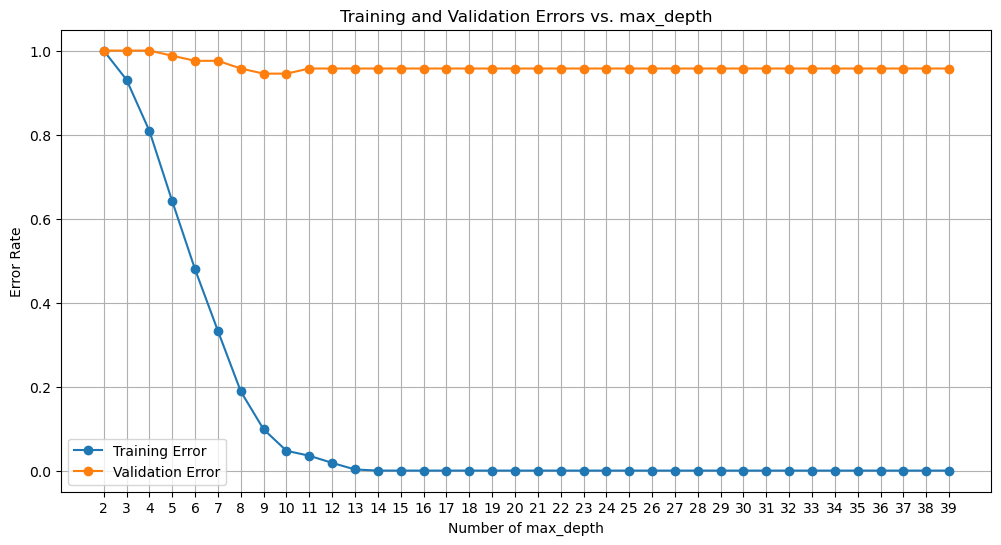

In [19]:
finetuning_1D('max_depth', 2, 40, 1, 'n_estimators', 100, X_train, y_train, X_val, y_val)

### --> max_depth ~ 9

## Validation and Training error for different n_estimators

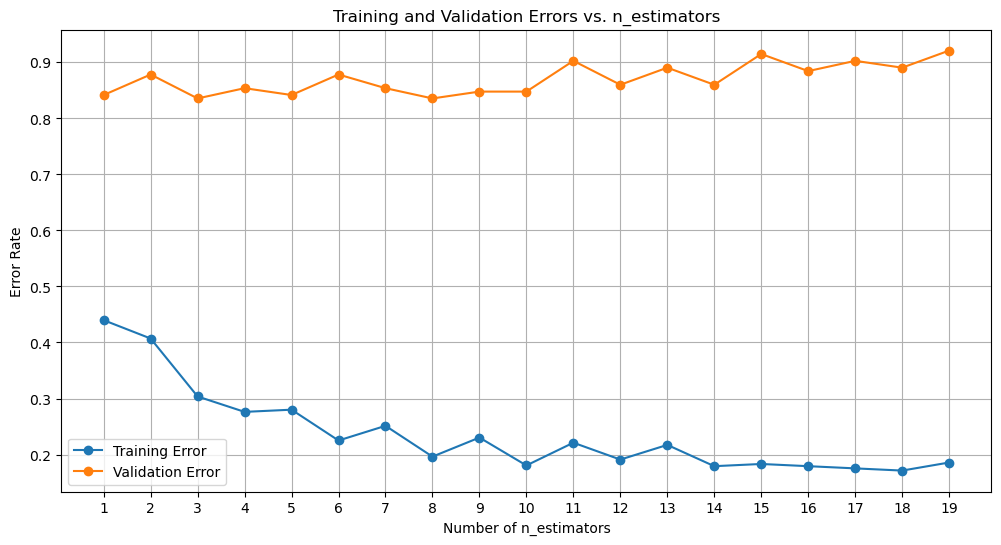

In [20]:
finetuning_1D('n_estimators', 1, 20, 1, 'max_depth', 9, X_train, y_train, X_val, y_val)

### n_estimators ~ 3

## The improvement in the validation error declines after the max_depth = 9 and n_estimators = 3. Beyond this value, the training error is probably reducing due to overfitting to the training set. We've narrowed the range of the parameters. Let's now incorporate cross validation to minimize overfitting to the specific training-test split.
## Grid Search with Cross Validation

In [21]:
# Define the parameter grid with appropriate prefixes for the base estimator
param_grid = {
    'estimator__n_estimators': range(1, 10, 1),  # Example values for n_estimators
    'estimator__max_depth': range(1, 10, 1),  # Example values for max_depth
    'estimator__min_samples_split': range(2, 12, 1)  # Example values for max_depth
}

# Instantiate the RandomForestClassifier and wrap with MultiOutputClassifier
rf_classifier = RandomForestClassifier(random_state=42)
model_grid = MultiOutputClassifier(rf_classifier)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model_grid,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy for evaluation
                           n_jobs=-1,  # Use all available cores
                           verbose=True)  # Print progress

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 810 candidates, totalling 4050 fits
Best Parameters: {'estimator__max_depth': 8, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 1}


## Validation and Training error for different max_features

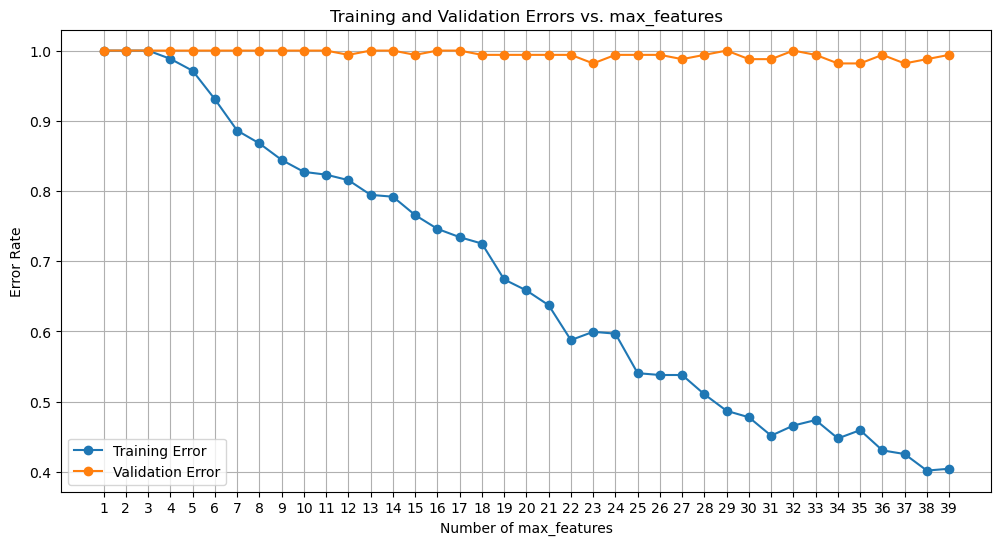

In [44]:
finetuning_1D('max_features', 1, 40, 1, 'max_depth', 8, X_train, y_train, X_val, y_val)

### --> max_features ~ 27 - 35

## Validation and Training error for different min_samples_leaf

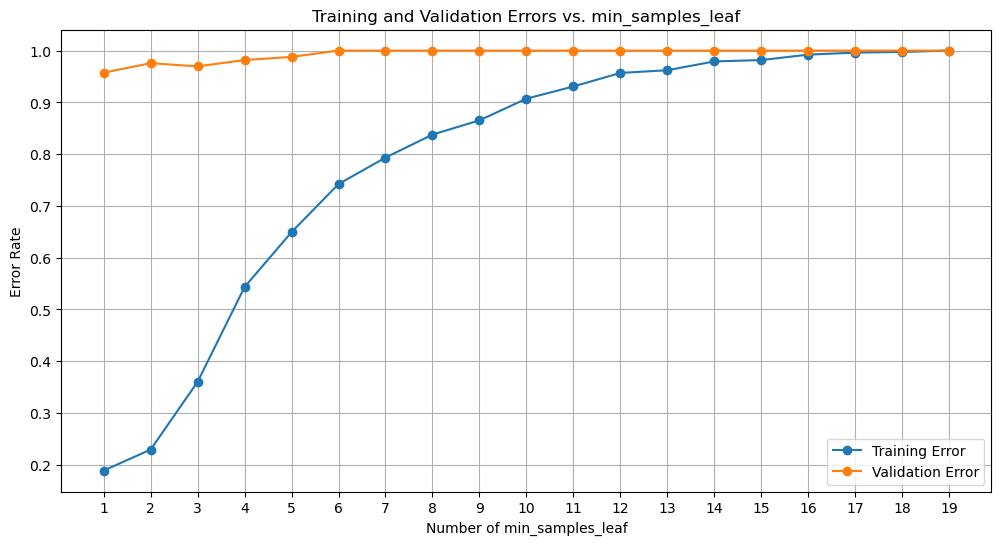

In [24]:
finetuning_1D('min_samples_leaf', 1, 20, 1, 'max_depth', 8, X_train, y_train, X_val, y_val)

### --> min_samples_leaf ~1

## Grid Search with Cross Validation for Narrowed Ranges of Parameters

In [46]:
# Define the parameter grid with appropriate prefixes for the base estimator
param_grid = {
    'estimator__n_estimators': range(1, 2, 1),  # Example values for n_estimators
    'estimator__max_depth': range(9, 10, 1),  # Example values for max_depth
    'estimator__min_samples_split': range(3, 4, 1),  # Example values for min_samples_split
    'estimator__max_features': range(26, 40, 1),  # Example values for max_depth
    'estimator__min_samples_leaf': range(1, 2, 1)  # Example values for max_depth
}

# Instantiate the RandomForestClassifier and wrap with MultiOutputClassifier
rf_classifier = RandomForestClassifier(random_state=42)
model_grid = MultiOutputClassifier(rf_classifier)

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model_grid,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Use accuracy for evaluation
                           n_jobs=-1,  # Use all available cores
                           verbose=True)  # Print progress

# Fit the model
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Best Parameters: {'estimator__max_depth': 9, 'estimator__max_features': 27, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 3, 'estimator__n_estimators': 1}


## Creating the RFC with the best n_estimator and max_depth values

In [47]:
rfclass = RandomForestClassifier(n_estimators=1, max_depth = 9, max_features=27, min_samples_leaf=1, min_samples_split=3, random_state=42) # n_estimators=100,max_features='sqrt',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,random_state=42,class_weight='balanced'
rfclass

RandomForestClassifier(max_depth=9, max_features=27, min_samples_split=3,
                       n_estimators=1, random_state=42)

## Wrap it in MultiOutputClassifier for multi-label classification and __TRAIN__ the Model

In [48]:
model = MultiOutputClassifier(rfclass)

# Train the model
model.fit(X_train, y_train)


MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=9,
                                                       max_features=27,
                                                       min_samples_split=3,
                                                       n_estimators=1,
                                                       random_state=42))

# Model Assessment

## ASSESS: Confusion Matrix and Accuracy on the ***Training*** Set

In [49]:
y_pred_train = model.predict(X_train)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Calculate accuracy if needed
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Overall Accuracy: {accuracy_train:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_train.columns):
    cm = confusion_matrix(y_train.iloc[:, i], y_pred_train[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.51      0.59        43
           1       0.62      0.37      0.46        62
           2       0.70      0.39      0.50        59
           3       0.65      0.52      0.58        42
           4       0.69      0.52      0.60        65
           5       0.55      0.53      0.54        68
           6       0.71      0.50      0.59        10
           7       0.62      0.37      0.46        62
           8       0.83      0.63      0.72        68
           9       0.71      0.43      0.54        46
          10       0.83      0.26      0.40        38
          11       0.79      0.53      0.63        70
          12       0.61      0.33      0.43        69
          13       0.80      0.82      0.81        62

   micro avg       0.70      0.49      0.57       764
   macro avg       0.70      0.48      0.56       764
weighted avg       0.70      0.49      0.56       764
 s

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



## Make Predictions on the ***Validation*** Data

In [50]:
y_pred = model.predict(X_val)

In [51]:
print(y_val.shape)
print(y_pred.shape)

(164, 14)
(164, 14)


## ASSESS: Confusion Matrix and Accuracy on the Validation Set
### - Lower accuracy on the validation set --> Overfitting

In [52]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Calculate accuracy if needed
accuracy = accuracy_score(y_val, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")

# Print the confusion matrix for each target variable
print("\nConfusion Matrix (Training Set):")
for i, col in enumerate(y_val.columns):
    cm = confusion_matrix(y_val.iloc[:, i], y_pred[:, i])
    print(f"Confusion Matrix for {col}:\n{cm}\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.11      0.12         9
           1       0.00      0.00      0.00        14
           2       0.22      0.15      0.18        13
           3       0.00      0.00      0.00         9
           4       0.67      0.14      0.24        14
           5       0.27      0.27      0.27        15
           6       0.00      0.00      0.00         2
           7       0.29      0.15      0.20        13
           8       0.71      0.36      0.48        14
           9       0.56      0.50      0.53        10
          10       0.20      0.12      0.15         8
          11       0.60      0.20      0.30        15
          12       0.21      0.20      0.21        15
          13       0.33      0.38      0.36        13

   micro avg       0.31      0.20      0.24       164
   macro avg       0.30      0.19      0.22       164
weighted avg       0.33      0.20      0.24       164
 s

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



## Below I **REMOVE** American samples and ASSESS the validation predictions using the same model (no retraining or recalculations) --> No improvement! Still approximately 19% accuracy.

In [53]:
pred_columns = y_val.columns.tolist()
amer_columns = ['Colombian','Mexican Ancestry','Puerto Rican']

In [54]:
y_pred_df = pd.DataFrame(y_pred, columns = pred_columns)

In [55]:
# Get the indices of y_val where 'American Ancestry' is True
filtered_rows = y_val[amer_columns].any(axis=1)

# Get the rows that match the condition
y_val_no_murica = y_val[~filtered_rows]

# Find the indices of the included rows
indices_to_include = y_val_no_murica.index.tolist()

In [56]:
# Include the same indices from y_pred_df
y_pred_no_murica = y_pred_df.iloc[indices_to_include]

In [57]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_val_no_murica, y_pred_no_murica))

# Calculate accuracy if needed
accuracy = accuracy_score(y_val_no_murica, y_pred_no_murica)
print(f"Overall Accuracy: {accuracy:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.11      0.12         9
           1       0.00      0.00      0.00        14
           2       0.25      0.15      0.19        13
           3       0.00      0.00      0.00         0
           4       0.67      0.14      0.24        14
           5       0.31      0.27      0.29        15
           6       0.00      0.00      0.00         2
           7       0.33      0.15      0.21        13
           8       0.71      0.36      0.48        14
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.60      0.20      0.30        15
          12       0.25      0.20      0.22        15
          13       0.36      0.38      0.37        13

   micro avg       0.30      0.20      0.24       137
   macro avg       0.26      0.14      0.17       137
weighted avg       0.37      0.20      0.24       137
 s

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



## Multilabel Confusion Matrix for Training Set

In [58]:
y_train_pred_df = pd.concat([y_train.reset_index(drop=True),y_pred_df], axis = 1)
grouped_data= y_train_pred_df.groupby(dummy_columns).sum() #[::-1]
grouped_data

African Ancestry SW  \
Population name_African Ancestry SW Population name_British Population name_CEPH Population name_Colombian Population name_Finnish Population name_Han Chinese Population name_Iberian Population name_Japanese Population name_Luhya Population name_Mexican Ancestry Population name_Puerto Rican Population name_Southern Han Chinese Population name_Toscani Population name_Yoruba                       
False                               False                   False                False                     False                   False                       False                   False                    False                 False                            False                        False                                False                   True                                     0   
                                                                                                                                                                                                                                                                                                                                         True                    False                                    1   
                                                                                                                                                                                                                                                                                                    True                                 False                   False                                    0   
                                                                                                                                                                                                                                                                       True                         False                                False                   False                                    1   
                                                                                                                                                                                                                                      True                             False                        False                                False                   False                                    0   
                                                                                                                                                                                                                True                  False                            False                        False                                False                   False                                    1   
                                                                                                                                                                                       True                     False                 False                            False                        False                                False                   False                                    1   
                                                                                                                                                               True                    False                    False                 False                            False                        False                                False                   False                                    0   
                                                                                                                                   True                        False                   False                    False                 False                            False                        False                                False                   False                            

## The Rows that aren't Categorized into any group --> Majority of them!

In [59]:
# Create the boolean mask to check if all specified ancestry columns are False
all_false_mask = ~y_train_pred_df[pred_columns].any(axis=1)

# Filter the DataFrame to get the rows where all specified columns are False
result = y_train_pred_df[all_false_mask]
print(result.shape)
# Confirm that none of the categories are predicted as True, should be 0
result[pred_columns].sum().sum()

(680, 28)


0

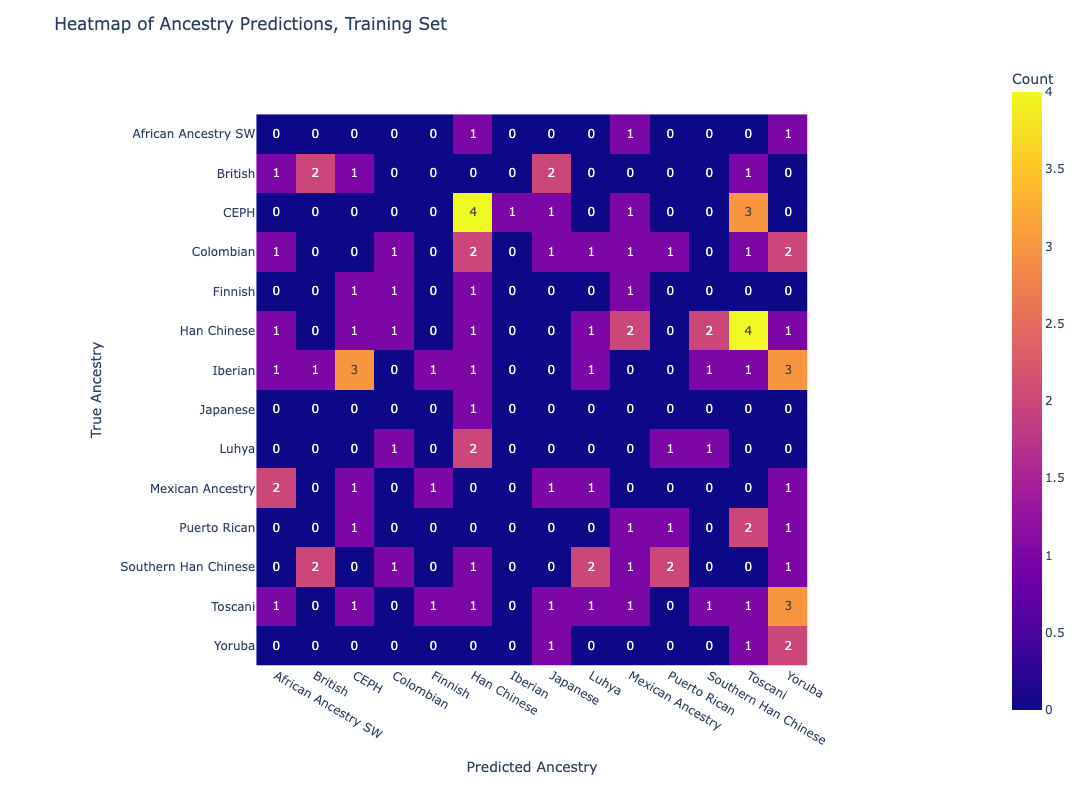

In [60]:
#index_y=['European', 'East Asian', 'African']
index_x=pred_columns
index_y = pred_columns#[::-1]

# Create an interactive heatmap
fig = px.imshow(grouped_data.values,
                labels=dict(x='Predicted Ancestry', y='True Ancestry', color='Count'),
                x=index_x,
                y=index_x,
                #color_continuous_scale='Blues',
                text_auto=True)

# Update layout
fig.update_layout(title='Heatmap of Ancestry Predictions, Training Set', width=1200, height=800)

# Save the heatmap as a PNG file
fig.write_image('Populations_training_cm_heatmap.png', scale=2)  # Scale can be adjusted for higher resolution

# Show the Plotly heatmap
fig.show()

# IDEA: Which snps are strong indicators of genotype? Identify. Do they coincide with biggest contributors to the principal components?
## Depending on the random_state of the random forest classifier, the features can have pretty different importances. To have a higher confidence and more reliable list of **important features**, I'll iterate over random_state and employ cross validation. This helps to mitigate the randomness inherent in the tree-building process and provides a more robust estimate of feature importance. 

### Without Averaging

In [63]:
# Dictionary to store importance DataFrames
importance_dataframes = {}
num_rs = range(2,53,5)
# Step to retrieve feature importance for each target with progress tracking
# Note: model_2.estimators_ will contain an estimator for each target variable

for i, col_name in tqdm(enumerate(y_train.columns), total=len(y_train.columns), desc='Processing Columns'):
    imp_to_ave = np.zeros(X_train.shape[1])
    for n in num_rs:
        # Extract the corresponding estimator for this output
        rfclass_test = RandomForestClassifier(n_estimators = 25, max_depth = 11, random_state = n)
        model_test = MultiOutputClassifier(rfclass_test)
        model_test.fit(X_train, y_train)
        
        estimator = model_test.estimators_[i]
        
        importances = estimator.feature_importances_
        imp_to_ave+= importances
    importance_ave = imp_to_ave/len(num_rs)
    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importance_ave
    }).sort_values(by='Importance', ascending=False)

    # Store the DataFrame in the dictionary with the column name
    importance_dataframes[col_name] = importance_df

    # Print feature importances for the current output variable
    print(f"\nFeature Importances for {col_name}:")
    print(importance_df)


Processing Columns:   7%|█▋                      | 1/14 [00:26<05:46, 26.66s/it]


Feature Importances for Population name_African Ancestry SW:
           Feature  Importance
35267  rs148509393    0.002444
43355  rs145610099    0.002260
11549  rs138853550    0.001998
28754  rs202166867    0.001975
25910  rs115286383    0.001974
...            ...         ...
17381  rs182921724    0.000000
17382     rs714962    0.000000
17383  rs144948583    0.000000
17385  rs117367874    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  14%|███▍                    | 2/14 [00:53<05:20, 26.72s/it]


Feature Importances for Population name_British:
           Feature  Importance
36212    rs9612014    0.001700
45770     rs130224    0.001539
24436  rs144412874    0.001386
3428   rs201221514    0.001361
8853    rs13054327    0.001335
...            ...         ...
17591  rs200519385    0.000000
17593  rs115524097    0.000000
17594     rs469230    0.000000
17595  rs188032990    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  21%|█████▏                  | 3/14 [01:19<04:52, 26.56s/it]


Feature Importances for Population name_CEPH:
           Feature  Importance
30829    rs9607592    0.003546
7173   rs187751955    0.002504
18146     rs737911    0.001615
9354   rs117474794    0.001519
20842    rs8135276    0.001386
...            ...         ...
17563   rs77545262    0.000000
17564   rs10427559    0.000000
17565  rs147580872    0.000000
17566  rs149430878    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  29%|██████▊                 | 4/14 [01:46<04:26, 26.64s/it]


Feature Importances for Population name_Colombian:
           Feature  Importance
11156  rs183112057    0.004977
19251  rs182584192    0.004553
29016  rs185425346    0.004128
29901  rs189662053    0.004009
46281  rs191146752    0.003000
...            ...         ...
17216  rs145215529    0.000000
17217  rs186428729    0.000000
17218  rs150742947    0.000000
17219  rs183571844    0.000000
24716  rs191606461    0.000000

[49432 rows x 2 columns]


Processing Columns:  36%|████████▌               | 5/14 [02:13<03:59, 26.63s/it]


Feature Importances for Population name_Finnish:
           Feature  Importance
5608   rs188819775    0.004686
47089     rs848734    0.003807
39526  rs142241202    0.003749
5589   rs192653216    0.003166
13534  rs183300253    0.002811
...            ...         ...
17469  rs183103472    0.000000
17470  rs192796007    0.000000
17471  rs189146632    0.000000
17472  rs181198178    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  43%|██████████▎             | 6/14 [02:39<03:32, 26.57s/it]


Feature Importances for Population name_Han Chinese:
           Feature  Importance
34323   rs76636806    0.002950
12633  rs200579307    0.002699
4957     rs5755677    0.002663
35244    rs5758754    0.002487
35442    rs2071843    0.002307
...            ...         ...
17740  rs144271692    0.000000
17741   rs75296199    0.000000
17742  rs192699465    0.000000
17743  rs192591985    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  50%|████████████            | 7/14 [03:06<03:05, 26.57s/it]


Feature Importances for Population name_Iberian:
           Feature  Importance
26061  rs189090903    0.006400
11183  rs183466496    0.003824
19978  rs185200178    0.003488
28366  rs181975228    0.003327
27332  rs182276607    0.003179
...            ...         ...
16849  rs181152976    0.000000
16850   rs56332784    0.000000
16851   rs77325912    0.000000
16852  rs187690005    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  57%|█████████████▋          | 8/14 [03:32<02:39, 26.53s/it]


Feature Importances for Population name_Japanese:
           Feature  Importance
31240  rs117678166    0.004282
24753  rs117923445    0.002994
43580   rs74887054    0.002838
44791  rs117410509    0.002619
28969  rs118189691    0.002453
...            ...         ...
17496    rs7288867    0.000000
17497  rs142582173    0.000000
17498   rs78580989    0.000000
17499  rs114681751    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  64%|███████████████▍        | 9/14 [03:59<02:12, 26.52s/it]


Feature Importances for Population name_Luhya:
           Feature  Importance
37361  rs200453884    0.004458
24459   rs73400090    0.003691
42873    rs6008066    0.003271
45482   rs58975775    0.003119
27614    rs9622436    0.002920
...            ...         ...
17361   rs78791110    0.000000
17362   rs73403064    0.000000
17364  rs191731747    0.000000
17365  rs143672919    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  71%|████████████████▍      | 10/14 [04:25<01:46, 26.59s/it]


Feature Importances for Population name_Mexican Ancestry:
           Feature  Importance
13583  rs141746790    0.006615
33073  rs148165520    0.004981
12541   rs12483839    0.004120
32379     rs135628    0.003974
10227  rs182901614    0.003637
...            ...         ...
17356  rs191127429    0.000000
17357    rs5763173    0.000000
17358  rs180673516    0.000000
17359  rs187421966    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  79%|██████████████████     | 11/14 [04:52<01:20, 26.71s/it]


Feature Importances for Population name_Puerto Rican:
           Feature  Importance
22632  rs181157088    0.005389
27951  rs192325551    0.005055
10887  rs190358156    0.003691
46270  rs190868764    0.003348
12935  rs185287587    0.003316
...            ...         ...
17122  rs142390023    0.000000
17123  rs112989561    0.000000
17124  rs116165185    0.000000
17125  rs183777668    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  86%|███████████████████▋   | 12/14 [05:19<00:53, 26.62s/it]


Feature Importances for Population name_Southern Han Chinese:
           Feature  Importance
45743     rs130201    0.003578
2545      rs361695    0.003270
38476  rs117846646    0.002809
11090  rs118043117    0.002425
34323   rs76636806    0.002408
...            ...         ...
17678  rs145784353    0.000000
17679  rs184455178    0.000000
17680  rs188194770    0.000000
17681  rs182211003    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns:  93%|█████████████████████▎ | 13/14 [05:47<00:27, 27.14s/it]


Feature Importances for Population name_Toscani:
           Feature  Importance
24245    rs5755030    0.001983
31612    rs3959642    0.001960
18898   rs13056240    0.001899
22434  rs147272260    0.001804
41465    rs9615989    0.001670
...            ...         ...
17650  rs191134588    0.000000
17651   rs11704455    0.000000
17652    rs2857636    0.000000
17653    rs6006202    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


Processing Columns: 100%|███████████████████████| 14/14 [06:14<00:00, 26.74s/it]


Feature Importances for Population name_Yoruba:
           Feature  Importance
25525     rs134285    0.006017
26928    rs5995249    0.004899
25529     rs134309    0.003565
27038   rs60910145    0.003565
23162   rs73402841    0.003403
...            ...         ...
17339   rs79544391    0.000000
17340  rs181621107    0.000000
17341    rs2072051    0.000000
17342    rs5997466    0.000000
49431  rs201907533    0.000000

[49432 rows x 2 columns]


## Important Features With Averaging over random_state AND Cross Validation

In [64]:
# Pre-optimized parameters
n_estimators = 25
max_depth = 11
n_folds = 5  # Number of CV folds
n_random_states = 20  # Number of different random states

# Dictionary to store importance DataFrames
importance_dataframes = {}

# Use StratifiedKFold to maintain the proportion of classes
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

# Iterate over each target label in y_train_no_murica
for i, col_name in tqdm(enumerate(y_train.columns), total=len(y_train.columns), desc='Processing Columns'):
    imp_to_ave = np.zeros(X_train.shape[1])  # Initialize for average importances
    ave_step = 0
    step_set_name = 'steps_if' + col_name
    impf_dict = {}
    # Iterate over random states
    for random_state in range(0,5*n_random_states,5):
        fold_importances = np.zeros(X_train.shape[1])  # To accumulate feature importances for the current random state
        ave_step+=1
        
        for train_idx, val_idx in kf.split(X_train, y_train[col_name]):
            rfclass_2 = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
            model_op = MultiOutputClassifier(rfclass_2)
  
            # Fit the model on the training split
            model_op.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
            
            # Extract the corresponding estimator for the current output
            estimator = model_op.estimators_[i]
            
            # Retrieve feature importances for the current estimator
            fold_importances += estimator.feature_importances_

        # Average the importances for this random state based on folds
        fold_importances /= n_folds
        
        # Accumulate the average importances across random states
        imp_to_ave += fold_importances
        
        # At every averaging over random state, save the set of the top 100 important features
        temp_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': imp_to_ave
        }).sort_values(by='Importance', ascending=False)
        imp_feat_set = set(temp_importance_df.iloc[1:100].Feature)
        impf_dict[ave_step] = imp_feat_set

    # Average the importances across different random states
    importance_ave = imp_to_ave / n_random_states

    # Create a DataFrame for feature importance
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importance_ave
    }).sort_values(by='Importance', ascending=False)
    
    impf_change_dict = pd.DataFrame(list(impf_dict.items()), columns=['Averaging Step', 'Important Feature Set'])

    # Store the DataFrame in the dictionary with the column name
    importance_dataframes[col_name] = importance_df
    importance_dataframes[step_set_name] = impf_change_dict

    # Print feature importances for the current output variable
    print(f"\nFeature Importances for {col_name}:")
    print(importance_df.head())
    #print(impf_change_dict)

Processing Columns:   7%|█▋                     | 1/14 [03:35<46:38, 215.27s/it]


Feature Importances for Population name_African Ancestry SW:
           Feature  Importance
32218  rs149067528    0.001434
28843   rs57067011    0.001210
15377    rs6005538    0.001089
37985  rs112961867    0.001086
43279  rs188412919    0.001086


Processing Columns:  14%|███▎                   | 2/14 [07:08<42:48, 214.06s/it]


Feature Importances for Population name_British:
           Feature  Importance
33431  rs145918602    0.001416
3428   rs201221514    0.001192
45770     rs130224    0.001142
29569   rs78998717    0.001121
36212    rs9612014    0.001071


Processing Columns:  21%|████▉                  | 3/14 [10:41<39:07, 213.41s/it]


Feature Importances for Population name_CEPH:
           Feature  Importance
7173   rs187751955    0.002326
1615    rs73159577    0.001677
30829    rs9607592    0.001492
3386    rs34292276    0.001246
38546    rs8141521    0.001166


Processing Columns:  29%|██████▌                | 4/14 [14:15<35:37, 213.72s/it]


Feature Importances for Population name_Colombian:
           Feature  Importance
29901  rs189662053    0.004962
19251  rs182584192    0.004257
11156  rs183112057    0.003001
46281  rs191146752    0.002065
3296   rs192903233    0.001932


Processing Columns:  36%|████████▏              | 5/14 [17:53<32:18, 215.35s/it]


Feature Importances for Population name_Finnish:
           Feature  Importance
7789   rs148435765    0.002895
5796   rs201268753    0.002792
39526  rs142241202    0.002375
47089     rs848734    0.002313
5320     rs4820583    0.002278


Processing Columns:  43%|█████████▊             | 6/14 [21:29<28:45, 215.71s/it]


Feature Importances for Population name_Han Chinese:
          Feature  Importance
34773  rs80315638    0.003072
34222   rs5758425    0.002920
23437   rs9607089    0.002354
34323  rs76636806    0.002235
35310   rs2038187    0.002142


Processing Columns:  50%|███████████▌           | 7/14 [25:04<25:06, 215.17s/it]


Feature Importances for Population name_Iberian:
           Feature  Importance
18269  rs192786817    0.002612
36161   rs12169371    0.002311
11481  rs181326899    0.002249
18012  rs188885366    0.001994
19915   rs73160632    0.001946


Processing Columns:  57%|█████████████▏         | 8/14 [28:34<21:22, 213.75s/it]


Feature Importances for Population name_Japanese:
           Feature  Importance
44791  rs117410509    0.003021
33772  rs117078907    0.002936
34438  rs150192691    0.002536
31240  rs117678166    0.002336
26668  rs145568902    0.002320


Processing Columns:  64%|██████████████▊        | 9/14 [32:06<17:45, 213.17s/it]


Feature Importances for Population name_Luhya:
           Feature  Importance
45213   rs73431724    0.003353
16562  rs138871238    0.002241
16566  rs147889790    0.001887
24467    rs2142690    0.001863
45208   rs73431711    0.001801


Processing Columns:  71%|███████████████▋      | 10/14 [35:39<14:12, 213.07s/it]


Feature Importances for Population name_Mexican Ancestry:
           Feature  Importance
33073  rs148165520    0.004819
5037   rs145029830    0.003877
4973      rs917408    0.003783
33144  rs147366860    0.003603
32696  rs142655533    0.003547


Processing Columns:  79%|█████████████████▎    | 11/14 [39:09<10:36, 212.19s/it]


Feature Importances for Population name_Puerto Rican:
           Feature  Importance
8164   rs113385040    0.003234
46270  rs190868764    0.002971
11748  rs193007090    0.002370
22632  rs181157088    0.002090
27951  rs192325551    0.002056


Processing Columns:  86%|██████████████████▊   | 12/14 [42:45<07:06, 213.17s/it]


Feature Importances for Population name_Southern Han Chinese:
          Feature  Importance
34773  rs80315638    0.002307
31528   rs3830119    0.002232
34323  rs76636806    0.001930
15232  rs16985013    0.001864
1246   rs60414822    0.001857


Processing Columns:  93%|████████████████████▍ | 13/14 [46:23<03:34, 214.67s/it]


Feature Importances for Population name_Toscani:
           Feature  Importance
18898   rs13056240    0.001269
24230   rs56322008    0.001223
15785  rs113565025    0.001142
6060   rs138337151    0.001112
8446   rs147677124    0.001067


Processing Columns: 100%|██████████████████████| 14/14 [49:54<00:00, 213.93s/it]


Feature Importances for Population name_Yoruba:
           Feature  Importance
27038   rs60910145    0.004139
27048   rs60295735    0.002950
14157  rs145182868    0.002552
9511    rs34814300    0.002347
41396    rs6007892    0.002262


In [91]:
print(importance_dataframes.keys())

dict_keys(['African Ancestry', 'steps_ifAfrican Ancestry', 'East Asian Ancestry', 'steps_ifEast Asian Ancestry', 'European Ancestry', 'steps_ifEuropean Ancestry'])


In [92]:
# Convert to DataFrames
df_african = importance_dataframes['African Ancestry']
df_african['Category'] = 'African Ancestry'

df_eastern = importance_dataframes['East Asian Ancestry']
df_eastern['Category'] = 'East Asian Ancestry'

df_european = importance_dataframes['European Ancestry']
df_european['Category'] = 'European Ancestry'

df_afr_feature_stability = importance_dataframes['steps_ifAfrican Ancestry']
df_ea_feature_stability = importance_dataframes['steps_ifEast Asian Ancestry']
df_eur_feature_stability = importance_dataframes['steps_ifEuropean Ancestry']

# Calculate the stability of features over time
calculate_overlap(df_afr_feature_stability)
calculate_overlap(df_ea_feature_stability)
calculate_overlap(df_eur_feature_stability)
# Combine all DataFrames
combined_importances = pd.concat([df_african, df_eastern, df_european])

# Set the order of categories for plotting
combined_importances['Category'] = pd.Categorical(combined_importances['Category'], 
                                                  categories=['African Ancestry', 'East Asian Ancestry', 'European Ancestry'],
                                                  ordered=True)

In [93]:
df_afr_feature_stability.tail()

,Averaging Step,Important Feature Set,Overlap Size
25,26,"{rs181507751, rs5995160, rs134309, rs8140703, ...",98
26,27,"{rs181507751, rs5995160, rs134309, rs8140703, ...",97
27,28,"{rs181507751, rs5995160, rs134309, rs8140703, ...",97
28,29,"{rs181507751, rs5995160, rs134309, rs8140703, ...",98
29,30,"{rs181507751, rs5995160, rs134309, rs8140703, ...",98


## Are the Important Features stable?

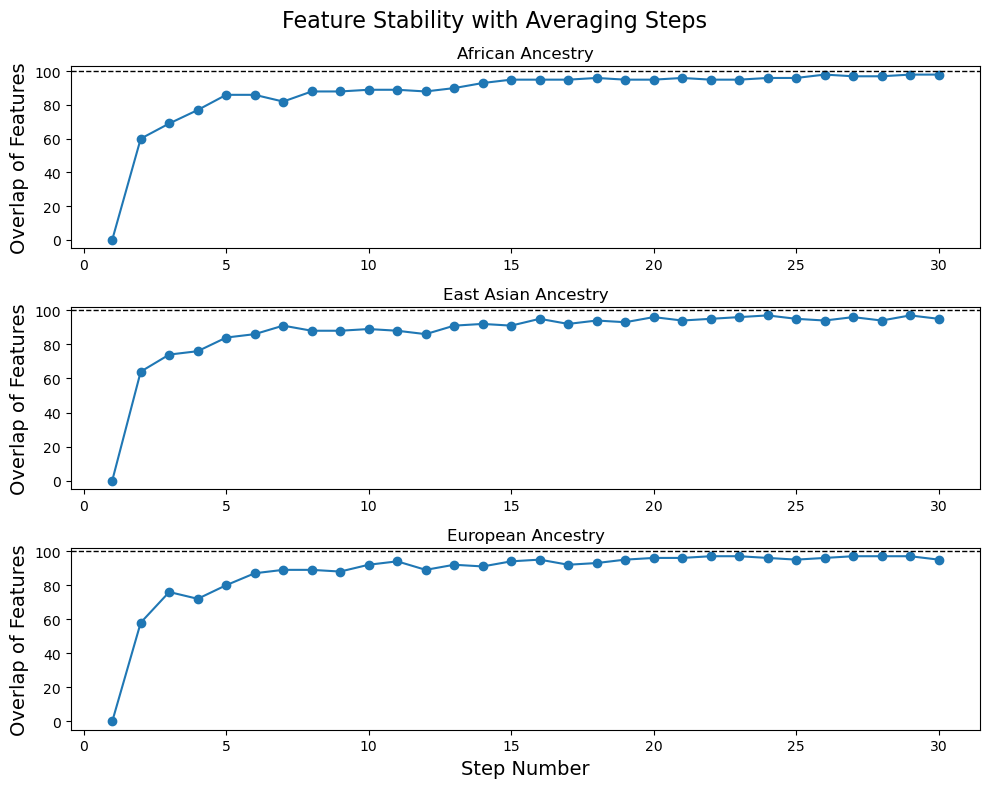

In [180]:
# Create the entire figure and subplots
plt.figure(figsize=(10, 8))
plt.suptitle('Feature Stability with Averaging Steps', fontsize=16) 

plt.subplot(3, 1, 1)
plt.plot(df_afr_feature_stability['Averaging Step'], df_afr_feature_stability['Overlap Size'], 'o-')
plt.title('African Ancestry')
plt.axhline(100, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=100
plt.ylabel('Overlap of Features', fontsize=14)

plt.subplot(3, 1, 2)
plt.plot(df_ea_feature_stability['Averaging Step'], df_ea_feature_stability['Overlap Size'], 'o-')
plt.title('East Asian Ancestry')
plt.axhline(100, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=100
plt.ylabel('Overlap of Features', fontsize=14)

plt.subplot(3, 1, 3)
plt.plot(df_eur_feature_stability['Averaging Step'], df_eur_feature_stability['Overlap Size'], 'o-')
plt.title('European Ancestry')
plt.axhline(100, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=100
plt.ylabel('Overlap of Features', fontsize=14)

# Set shared x and y labels
plt.xlabel('Step Number', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot
plt.savefig('Figures/Feature_Stability_22.png', format='png', dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed

# Show the combined figure
plt.show()

## Save the Feature Importance Dataframes in Heirarchical Order

In [129]:
df_african.to_csv('Results/African_Feature_Importance_22.csv', index=False)
df_eastern.to_csv('Results/East_Asian_Feature_Importance_22.csv', index=False)
df_european.to_csv('Results/European_Feature_Importance_22.csv', index=False)

## Let's visualize to see if the distinguishing snps are different for the different populations!

## Venn Diagram of overlap of the important alleles between groups
### The lack of overlap is expected because these are the alleles that best help distinguish these populations. Whether or not I've found something significant needs to be validated with biological knowledge.
#### - Are these snps known to be markers of ancestory? **Some are associated with ancestry!!**
#### - Have I identified any new potential markers? **Possibly**
#### - Has this analysis missed any important markers that make the results suspicious? **The rs60910145 snp wasn't picked as predictive of African ancestry**

### Importance > 0.001

In [134]:
african_vimp_alleles =  df_african[df_african['Importance']>0.001]
eastern_vimp_alleles =  df_eastern[df_eastern['Importance']>0.001]
european_vimp_alleles =  df_european[df_european['Importance']>0.001]
print(african_vimp_alleles.shape)
print(eastern_vimp_alleles.shape)
print(european_vimp_alleles.shape)

(241, 3)
(227, 3)
(195, 3)


In [139]:
african_vimp_alleles['Importance'].sum()

0.5523756067840869

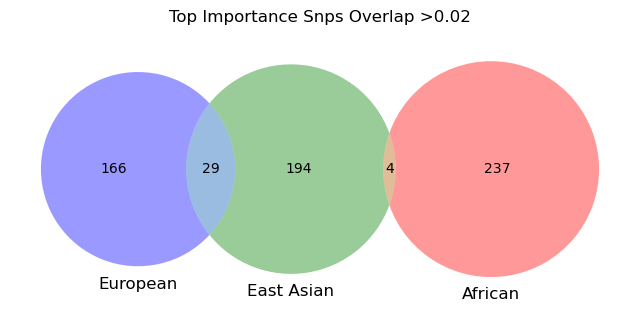

In [135]:
# Create a Venn diagram for the sets
plt.figure(figsize=(8, 8))
#venn3([set_coverage,set_coverage_fail, set_CNV_calling, set_CNV_calling_fail, set_passed_well, set_passed_well_fail], ('Coverage','Coverage Fail', 'CNV Calling','CNV Calling Fail', 'Passed Well', 'Passed Well Fail'))
#venn3([set_coverage, set_coverage_fail], ('Coverage','Coverage Fail'))
venn3([set(african_vimp_alleles.index),set(eastern_vimp_alleles.index),set(european_vimp_alleles.index)], ('African','East Asian', 'European'))
# Set title and show the plot
plt.title('Top Importance Snps Overlap >0.02')
# Save the figure as a PNG file
plt.savefig('Top_importance_Snps_venn_diagram.png', format='png', dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

### Importance > 0.01

In [132]:
african_imp_alleles =  df_african[df_african['Importance']>0.01]
eastern_imp_alleles =  df_eastern[df_eastern['Importance']>0.01]
european_imp_alleles =  df_european[df_european['Importance']>0.01]
print(african_imp_alleles.shape)
print(eastern_imp_alleles.shape)
print(european_imp_alleles.shape)

(0, 3)
(0, 3)
(0, 3)


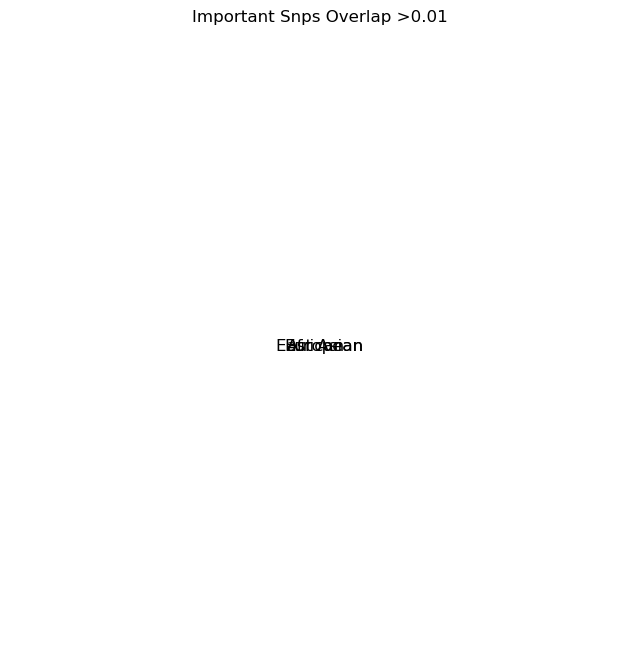

In [133]:
# Create a Venn diagram for the sets
plt.figure(figsize=(8, 8))
#venn3([set_coverage,set_coverage_fail, set_CNV_calling, set_CNV_calling_fail, set_passed_well, set_passed_well_fail], ('Coverage','Coverage Fail', 'CNV Calling','CNV Calling Fail', 'Passed Well', 'Passed Well Fail'))
#venn3([set_coverage, set_coverage_fail], ('Coverage','Coverage Fail'))
venn3([set(african_imp_alleles.index),set(eastern_imp_alleles.index),set(european_imp_alleles.index)], ('African','East Asian', 'European'))
# Set title and show the plot
plt.title('Important Snps Overlap >0.01')
# Save the figure as a PNG file
plt.savefig('Important_Snps_venn_diagram.png', format='png', dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed
plt.show()

In [140]:
print(f'Important alleles for African ancestry prediction: {african_vimp_alleles.head()}')
print(f'Important alleles for East Asian ancestry prediction: {eastern_vimp_alleles.head()}')
print(f'Important alleles for European ancestry prediction: {european_vimp_alleles.head()}')

Important alleles for African ancestry prediction:           Feature  Importance          Category
42019  rs11913160    0.007133  African Ancestry
42309   rs6009017    0.006795  African Ancestry
42884   rs5845775    0.006325  African Ancestry
41396   rs6007892    0.005642  African Ancestry
9275     rs762265    0.005513  African Ancestry
Important alleles for East Asian ancestry prediction:           Feature  Importance             Category
21591   rs5754182    0.006718  East Asian Ancestry
34773  rs80315638    0.006032  East Asian Ancestry
31329   rs5757590    0.005842  East Asian Ancestry
21590   rs4821079    0.005755  East Asian Ancestry
23430    rs738987    0.005645  East Asian Ancestry
Important alleles for European ancestry prediction:           Feature  Importance           Category
8776   rs11090237    0.007271  European Ancestry
36446  rs11704383    0.005519  European Ancestry
34043   rs5758386    0.005077  European Ancestry
19718   rs5749246    0.004520  European Ancestry
4663

# Looking into the Functions and Association of Identifier Important Snps:
## For African Ancestry Prediction
1) rs6007892: rs6007892 is located in the <u>**SLC24A5 gene**</u>, which is known to play a significant role in **skin pigmentation**, particularly in the context of **adaptation to varying UV radiation levels**. Variants in this gene have been associated with lighter skin pigmentation in European populations. The presence of certain alleles is particularly notable in discussions of ancestry and adaptive traits among populations.

2) rs2142690: This SNP is located in the CYP3A4 gene, which encodes an enzyme involved in **drug metabolism**. rs2142690 has been studied for its implications in how individuals metabolize medications, potentially influencing treatment efficacy and drug interactions. Variants in CYP3A4 can lead to **differences in drug responses among diverse populations**.

3) rs5845775: rs5845775 is associated with the **APOL1 gene**, which has implications in **kidney function and disease**. Variants, including rs5845775, have been linked to increased risk of kidney disease, **particularly in individuals of African descent**. Understanding this SNP is critical for recognizing genetic predispositions to hypertension and chronic kidney disease.

4) rs73417737: This SNP is located near the PRKG1 gene, which is involved in signaling **pathways related to smooth muscle relaxation and blood pressure regulation**. Research suggests that variants in this gene are implicated in cardiovascular health, particularly in relation to blood pressure regulation. This SNP may have associations with hypertension and cardiovascular risk factors.

5) rs6008769: rs6008769 is located in the MIR2113 gene, which is a microRNA gene. MicroRNAs play critical roles in gene regulation and expression. Variants in microRNA genes, including MIR2113, **may influence gene regulatory networks** involved in various biological processes, potentially linking to traits such as cancer susceptibility and inflammatory responses.

## For East Asian Ancestry Prediction
1) rs738987: rs738987 is located in the <u>**SLC24A5 gene**</u>, which encodes a sodium/calcium/potassium exchanger involved in **skin pigmentation**. Variants in SLC24A5 are associated with **lighter skin pigmentation** and are known to be a significant marker for differentiation of European ancestry. This SNP demonstrates natural selection related to UV adaptation in populations.

2) rs5758754: This SNP is located near the CEACAM1 gene, which is involved in **cell adhesion and immune response**. Research has indicated **associations of this SNP with susceptibility to certain infections and immune-related conditions**. Its role in cell signaling makes it significant for understanding differences between populations regarding immune response.

3) rs916263: rs916263 is located in the HLA-DRA gene region, part of the human major histocompatibility complex (MHC). Variants in the HLA-DRA region are critical for the **immune response**, particularly in presenting antigens to immune cells. This SNP has been associated with various **autoimmune diseases**, illustrating its importance in health and disease susceptibility.

4) rs2071843: This SNP is located in the KLF14 gene, which is involved in the regulation of **lipid metabolism and insulin sensitivity**. Variants in KLF14 have been linked to **obesity and diabetes risk**, particularly through their effects on body fat distribution. Understanding this SNP can provide insights into metabolic health in different populations.

5) rs72619546: rs72619546 is located in an intergenic region near the CYP1A1 gene. Although specific studies on this SNP may be limited, the CYP1A1 gene is important in the **metabolism of xenobiotics and detoxification processes**. Variants in this region may affect cancer risk and response to environmental toxins.

## For European Ancestry Prediction
1) rs11090237: Located near the <u>**SLC24A5**</u> gene, which encodes a sodium/potassium/calcium exchanger involved in skin pigmentation. This SNP is primarily associated with variations in skin color, particularly contributing to lighter skin pigmentation in European populations. It has **been a significant focus** in studies of adaptation to varying UV environments.

2) rs5758386: Associated with the CYP27B1 gene, which is critical for **converting vitamin D into its active form**. Variants in this gene affect **vitamin D metabolism and calcium homeostasis**, influencing bone health. This SNP has implications for understanding how individuals metabolize vitamin D, especially in relation to **susceptibility to conditions such as osteoporosis and certain cancers**.

3) rs11704383: This SNP is found near the TBC1D4 gene, which is involved in **insulin signaling and glucose metabolism**. Variants in TBC1D4 are linked to obesity and type 2 diabetes, indicating a role in metabolic pathways. The association with glucose handling makes this SNP **important in studies related to metabolic disorders, especially in European populations**.

4) rs361557: Located in the NOD2 gene (Nucleotide-binding oligomerization domain-containing protein 2). This SNP is well-known for its involvement in the **immune response**, particularly regarding susceptibility to **Crohn’s disease**. The NOD2 gene plays a role in detecting bacterial components, and variations in this gene can increase the risk of inflammatory bowel disease.

5) rs11912448: This SNP is located in the LOC646279 gene, a **gene of unknown function** that may relate to other nearby genes. While specific studies directly linking rs11912448 to health outcomes may be limited, its association with nearby known genes contributes to ongoing research in the context of genetic epidemiology, particularly immune-related traits and various diseases.

# Notes:
## -> Three different Snps in the same gene, SLC24A5, are the most important features for all three ancestories!! This gene is associated with **skin pignmentation**. This is pretty promising that the model has predicted something of biological significance!

In [141]:
imp_af_filter = african_vimp_alleles['Feature'].tolist()
imp_af_filter += ['Superpopulation name_African Ancestry','Superpopulation name_European Ancestry','Superpopulation name_East Asian Ancestry','Superpopulation name_American Ancestry']
imp_eur_filter = european_vimp_alleles['Feature'].tolist()
imp_eur_filter += ['Superpopulation name_African Ancestry','Superpopulation name_European Ancestry','Superpopulation name_East Asian Ancestry','Superpopulation name_American Ancestry']
imp_ea_filter = eastern_vimp_alleles['Feature'].tolist()
imp_ea_filter += ['Superpopulation name_African Ancestry','Superpopulation name_European Ancestry','Superpopulation name_East Asian Ancestry','Superpopulation name_American Ancestry']

# Notable SNPs Predictive of European Ancestry:
## I wish I could compare to the list that 23andme uses... maybe I can figure which ones those are. Haven't searched enough yet

SLC24A5 (rs1426654):

This SNP is commonly associated with skin pigmentation in European populations. The "A" allele is particularly prevalent in Europeans and is linked to lighter skin tones.

HERC2 (rs12913832):

This SNP is associated with eye color, particularly blue eye color, which has a higher frequency in European populations. The "A" allele is commonly found in individuals of European descent.

TYR (rs1126809):

Associated with pigmentation traits, this SNP has been linked to lighter hair and skin color in Europeans. Variants in the TYR gene contribute to pigmentation in the skin, eyes, and hair.

OCA2 (rs1800407):

This SNP is also associated with skin pigmentation and eye color. It has been found to be more common in European populations compared to others.

ABCC11 (rs17822931):

This SNP is known for its association with the type of earwax (wet vs. dry) and is also found to be more common in European populations.

FTO (rs9939609):

Primarily studied for its association with obesity, this SNP has shown population differentiation and is frequently researched in the context of European ancestry.

RGS4 (rs1611115):

Studied for its association with traits in populations of European ancestry, particularly in studies related to psychiatric disorders.
ALDH2 (rs671):

Although primarily considered a marker in East Asian populations for alcohol metabolism, this SNP has also shown associations when analyzing European ancestries in specific contexts.

## Are any of these snps in this data set? Are they of high importance for prediction of any class?

In [142]:
european_predictive_snps = [
    'rs1426654',  # SLC24A5
    'rs12913832',  # HERC2
    'rs1126809',  # TYR
    'rs1800407',  # OCA2
    'rs9939609',  # FTO
    'rs1611115',  # RGS4
    'rs671',      # ALDH2
    'rs123456'    # Example not included
]
african_predictive_snps = [
    "rs73885319",  # APOL1 gene variant associated with kidney disease
    "rs60910145",  # Another APOL1 gene variant
    "rs1050828",    # G6PD gene variant associated with glucose-6-phosphate dehydrogenase deficiency
    "rs670",        # TBC1D4 gene variant associated with insulin signaling
    "rs1126809",    # TYR gene variant associated with pigmentation
    "rs16891982",   # SLC24A5 gene variant related to pigmentation (while more common in Europeans, it has significance in ancestry studies)
    "E haplogroup"  # Reference to Y-chromosome haplogroup prevalent in many African populations
]
eastern_asian_predictive_snps = [
    "rs1464510",   # Associated with East Asian populations, particularly related to skin pigmentation
    "rs72865916",  # A variant linked to positive selection in East Asian populations
    "rs16891982",  # SLC24A5 gene variant associated with pigmentation, though more commonly discussed in the context of European populations, it has relevance across populations
    "rs12913832",  # Associated with eye color, present in Asian as well as European contexts
    "rs2021702",   # Associated with specific traits in East Asian groups 
    "rs1183257",   # Involved in the association of body mass index (BMI) related traits in Asian populations
    "rs4820599",   # SNP associated with height, showing significant differences in East Asian populations
    "rs2555609",   # Related to lactose tolerance in East Asian populations
]

# Are these snps on this chromosome? I only collected every 10th snp in the dataset
target_snps_set = set(african_predictive_snps+european_predictive_snps+eastern_asian_predictive_snps)
# Check which SNPs are in the african_imp_alleles['Feature'] column
snp_matches = df_african['Feature'].isin(target_snps_set)
# Get the matching SNPs
matching_snps = df_african[snp_matches]
# Display the matching SNPs
print("The SNPs that are in this dataset:")
print(matching_snps)

# Convert the list of target SNPs to a set for faster lookup
target_snps_set = set(african_predictive_snps)
# Check which SNPs are in the african_imp_alleles['Feature'] column
african_snp_matches = african_imp_alleles['Feature'].isin(target_snps_set)
# Get the matching SNPs
matching_snps = african_imp_alleles[african_snp_matches]
# Display the matching SNPs
print("African Ancestry Predictive Matching SNPs:")
print(matching_snps)

# Convert the list of target SNPs to a set for faster lookup
target_snps_set = set(european_predictive_snps)
# Check which SNPs are in the african_imp_alleles['Feature'] column
european_snp_matches = european_imp_alleles['Feature'].isin(target_snps_set)
# Get the matching SNPs
matching_snps = european_imp_alleles[european_snp_matches]
# Display the matching SNPs
print("European Ancestry Predictive Matching SNPs:")
print(matching_snps)

# Convert the list of target SNPs to a set for faster lookup
target_snps_set = set(eastern_asian_predictive_snps)
# Check which SNPs are in the african_imp_alleles['Feature'] column
eastern_snp_matches = eastern_imp_alleles['Feature'].isin(target_snps_set)
# Get the matching SNPs
matching_snps = eastern_imp_alleles[eastern_snp_matches]
# Display the matching SNPs
print("East Asian Ancestry Predictive Matching SNPs:")
print(matching_snps)

The SNPs that are in this dataset:
          Feature  Importance          Category
27038  rs60910145    0.000219  African Ancestry
African Ancestry Predictive Matching SNPs:
Empty DataFrame
Columns: [Feature, Importance, Category]
Index: []
European Ancestry Predictive Matching SNPs:
Empty DataFrame
Columns: [Feature, Importance, Category]
Index: []
East Asian Ancestry Predictive Matching SNPs:
Empty DataFrame
Columns: [Feature, Importance, Category]
Index: []


### Importance >0.001

In [143]:
african_less_imp_alleles =  df_african[(df_african['Importance']>0.001)].reset_index()
eastern_less_imp_alleles =  df_eastern[(df_eastern['Importance']>0.001)].reset_index()
european_less_imp_alleles =  df_european[(df_european['Importance']>0.001)].reset_index()

## Interestingly, the only snp identified by ChatGPT as associated with African ancestry and is present in the dataset wasn't selected as one of the top importance snps for African ancestry prediction. It's #584 in importance!

In [144]:
african_less_imp_alleles[african_less_imp_alleles['Feature']== 'rs60910145']

,index,Feature,Importance,Category


# `Idea:`
## Do important feature occur more often / their occurance correlate with ancestry
## --> Look at occurences and correlations below
## Important Snps Correlations with Ancestry:

In [80]:
corr_df = pd.concat([X_train,y_train], axis = 1)
correlation, p_value = pearsonr(df['A'], df['B'])
corr_af_df = corr_df[imp_af_filter]
corr_eur_df = corr_df[imp_eur_filter]
corr_ea_df = corr_df[imp_ea_filter]

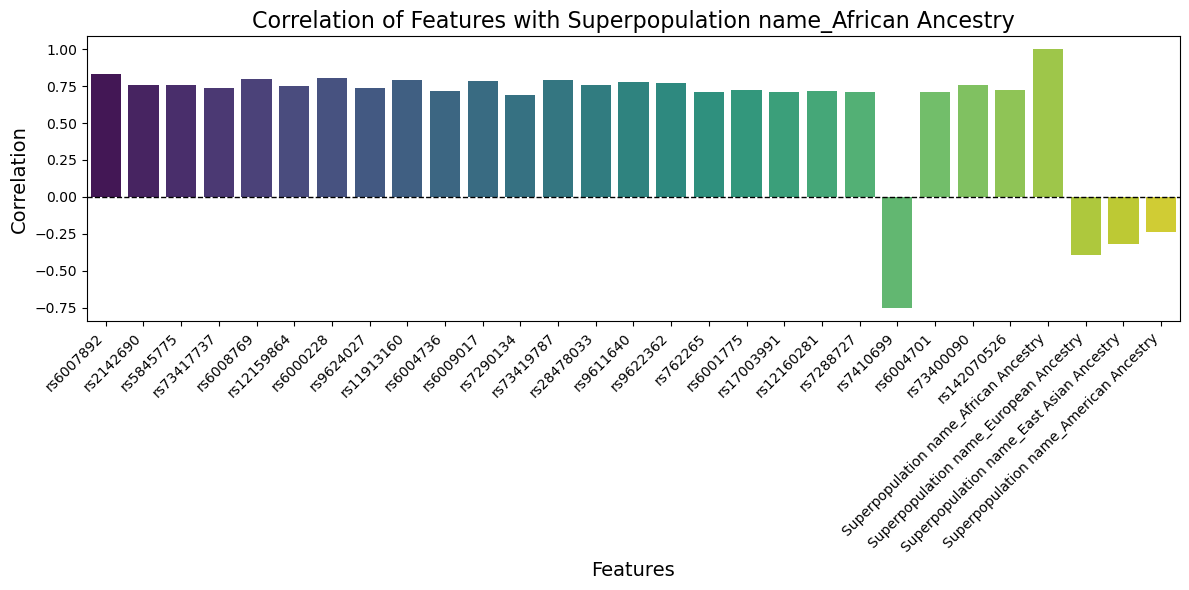

In [78]:
corr_plot(corr_af_df, 'Superpopulation name_African Ancestry')

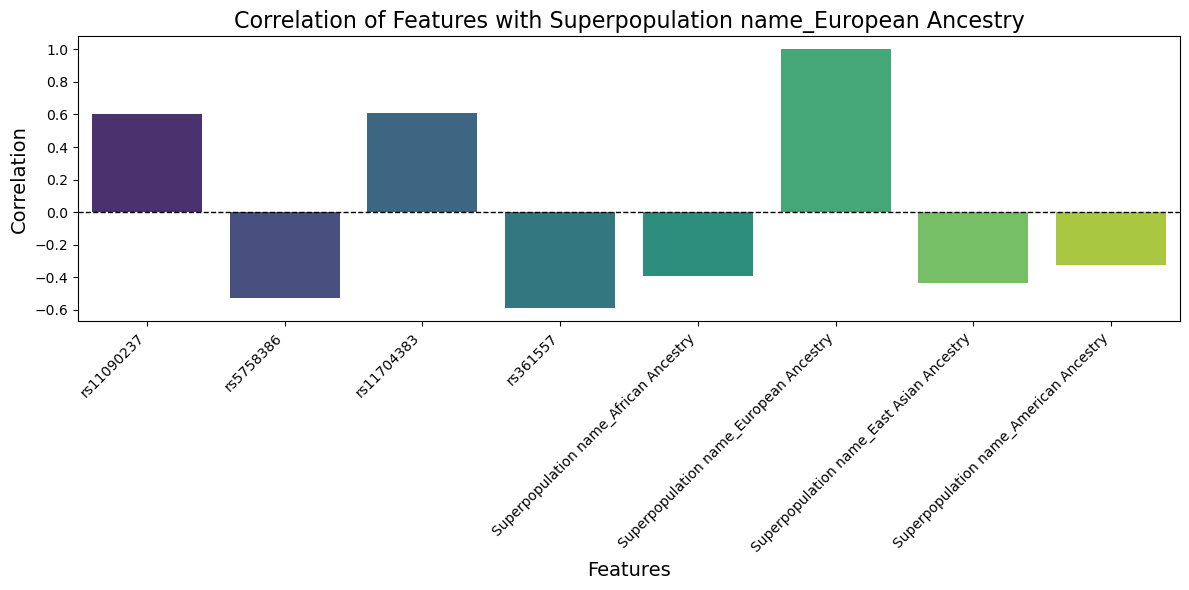

In [81]:
corr_plot(corr_eur_df, 'Superpopulation name_European Ancestry')

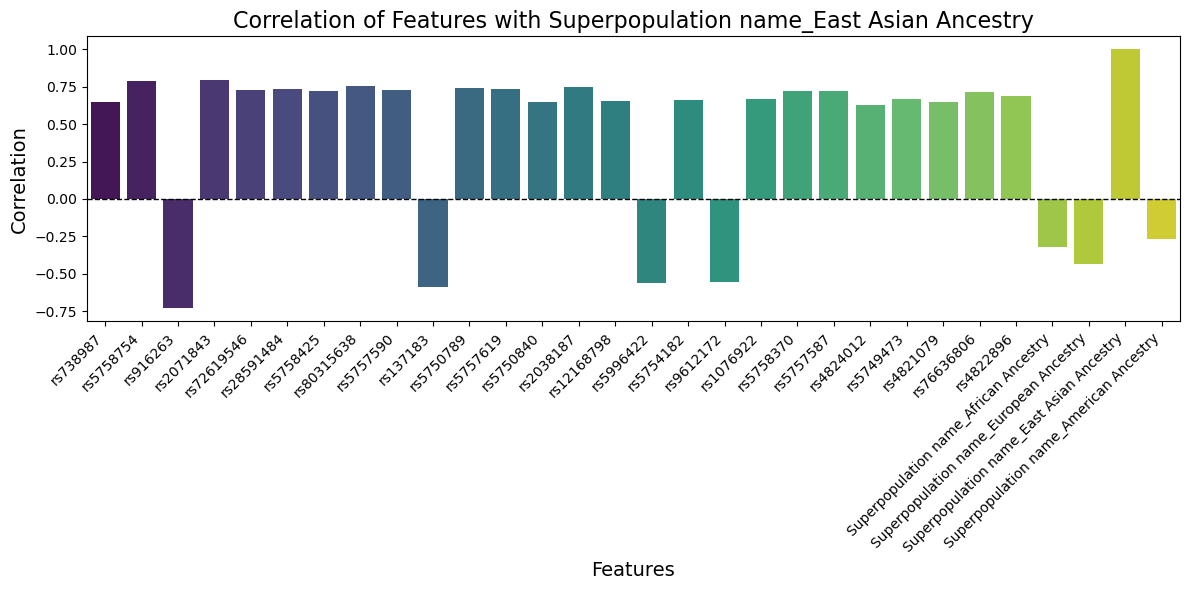

In [82]:
corr_plot(corr_ea_df, 'Superpopulation name_East Asian Ancestry')

## Important Snps Occurences by Ancestry:

In [113]:
occur_df =  pd.concat([X_train,meta_df], axis = 1)
occurances_df = occur_df.groupby('Superpopulation code').sum().reset_index()

## Percentage of occurence across superpopulations:

In [99]:
imp_af_occurances_df = occurances_df[imp_af_filter] #/ occurances_df['Superpopulation name_African Ancestry'].iloc[0] #.sort_values(ascending=False) 
imp_eur_occurances_df = occurances_df[imp_eur_filter] #/ occurances_df['Superpopulation name_European Ancestry'].iloc[3]
imp_ea_occurances_df = occurances_df[imp_ea_filter] #/ occurances_df['Superpopulation name_East Asian Ancestry'].iloc[2]

imp_af_occurances_df = imp_af_occurances_df/imp_af_occurances_df.sum(axis = 0)
imp_eur_occurances_df = imp_eur_occurances_df/imp_eur_occurances_df.sum(axis = 0)
imp_ea_occurances_df = imp_ea_occurances_df/imp_ea_occurances_df.sum(axis = 0)
named_columns = ['Superpopulation name_African Ancestry', 'Superpopulation name_European Ancestry','Superpopulation name_East Asian Ancestry','Superpopulation name_American Ancestry']

In [90]:
imp_af_occurances_df#.iloc[0] #, imp_eur_occurances_df, imp_ea_occurances_df

,rs6007892,rs2142690,rs5845775,rs73417737,rs6008769,rs12159864,rs6000228,rs9624027,rs11913160,rs6004736,...,rs12160281,rs7288727,rs7410699,rs6004701,rs73400090,rs142070526,Superpopulation name_African Ancestry,Superpopulation name_European Ancestry,Superpopulation name_East Asian Ancestry,Superpopulation name_American Ancestry
0,0.725995,0.976471,0.918782,0.969325,0.884774,0.960452,0.872,0.912821,0.933014,0.955128,...,0.957055,0.939394,0.103803,0.942675,0.97619,0.908602,1.0,0.0,0.0,0.0
1,0.103044,0.023529,0.065990,0.030675,0.065844,0.039548,0.064,0.066667,0.066986,0.044872,...,0.024540,0.060606,0.183043,0.057325,0.02381,0.091398,0.0,0.0,0.0,1.0
2,0.011710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.010256,0.000000,0.000000,...,0.000000,0.000000,0.316957,0.000000,0.00000,0.000000,0.0,0.0,1.0,0.0
3,0.159251,0.000000,0.015228,0.000000,0.049383,0.000000,0.064,0.010256,0.000000,0.000000,...,0.018405,0.000000,0.396197,0.000000,0.00000,0.000000,0.0,1.0,0.0,0.0


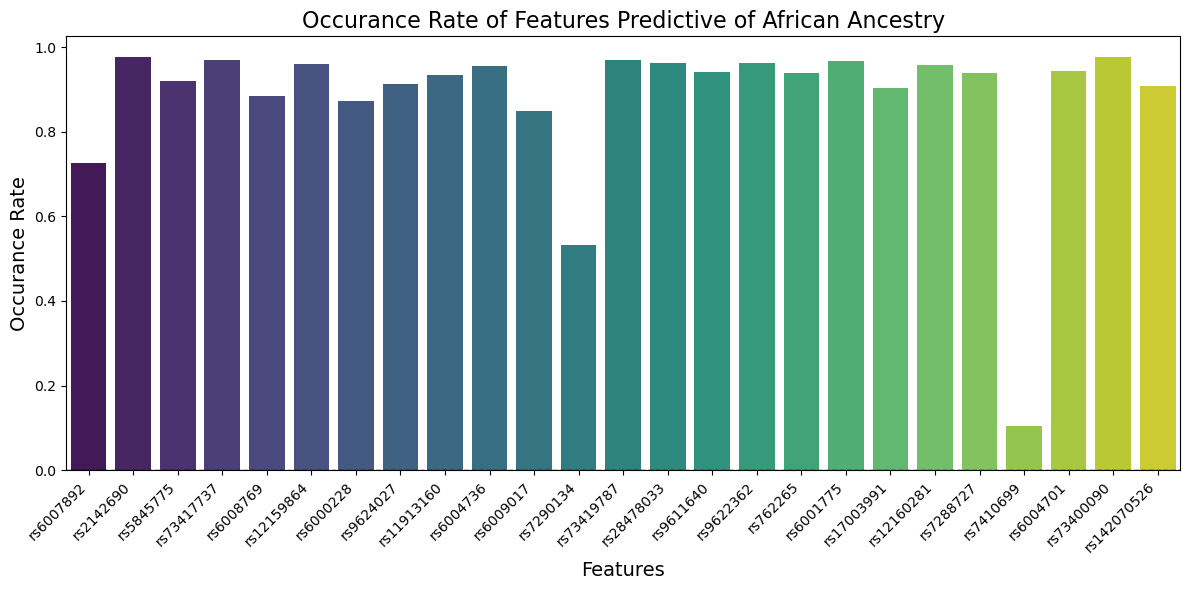

In [100]:
occ_plot(imp_af_occurances_df.drop(columns = named_columns),0,'African Ancestry')

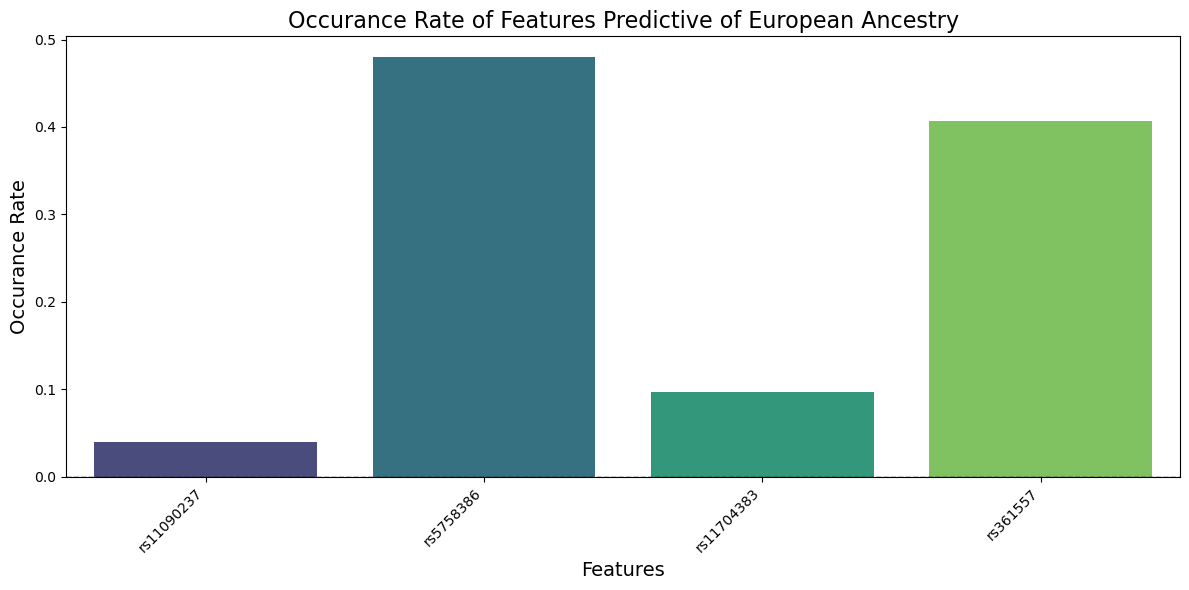

In [101]:
occ_plot(imp_eur_occurances_df.drop(columns = named_columns),0,'European Ancestry')

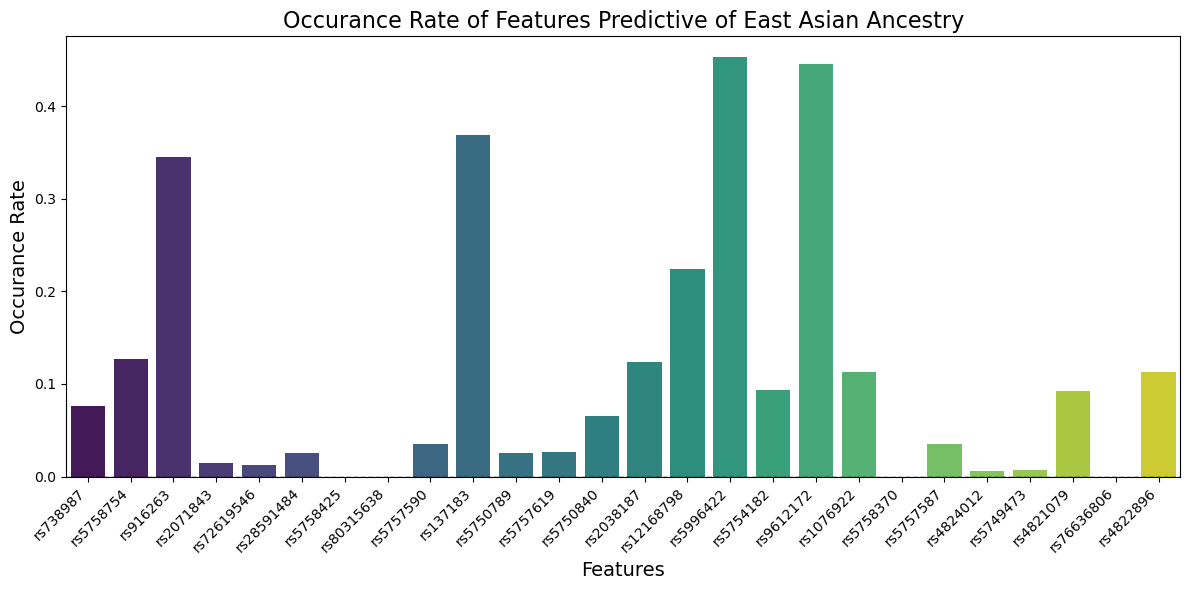

In [102]:
occ_plot(imp_ea_occurances_df.drop(columns = named_columns),0,'East Asian Ancestry')

# `Idea:`
## Certain snps are likely to be coinherited. I can combine snps into regions based on which ones are closely related in the principal component and/or random forest model, i.e., FEATURE ENGINEER and create a new model:

 1. Distance Measures
Linear Distance: This is the simplest method, calculating the absolute distance between two gene loci based on their genomic coordinates. For example: [ \text{Distance} = | \text{Position}{\text{Gene A}} - \text{Position}{\text{Gene B}} | ]
Proximity Thresholds: You can set thresholds (e.g., within 10,000 base pairs) to define genes as "proximal."
2. Clustering Algorithms
Hierarchical Clustering: This method can group genes based on their distances to one another. Genes that are closer together will form clusters, revealing patterns of proximity.
K-Means Clustering: Genes can be clustered into a specified number of groups based on distances, potentially identifying co-located or functionally related genes.
3. Graphs and Network Analysis
Graphical Models: Gene positions can be represented as a graph where nodes represent genes and edges represent proximity relationships. Algorithms can then be applied to analyze connectivity and proximity.
Gene Co-expression Networks: Genes can be connected based on expression correlation, and proximity can be assessed in the context of the network structure.
4. Sliding Window Analysis
By sliding a window across the genome with a specified size, you can analyze gene density, identify groups of neighboring genes, and examine their functional relationships.
5. Genomic Annotation Tools
Bedtools: A popular command-line toolkit to manipulate genomic intervals and calculate overlaps, distances, and proximity. It can be used to identify proximal genes based on their annotated genomic coordinates.
GFF/GTF Files: Tools that parse Gene Feature Format files can be used to calculate distances internally.
6. Computational Frameworks
R/Bioconductor: R packages like GenomicRanges or Biostrings are used extensively in genomics and can handle genomic intervals and distances.
Python Libraries: Libraries such as Pandas, Biopython, and PyBEDTools can facilitate calculations of distance and proximity between genes based on their genomic positions.
7. Statistical Methods
Conditional Random Fields (CRF): In the context of genomic data, CRFs can be trained to predict gene relationships based on their positions and sequence information.

# `Idea:`
## I can train random forest classifiers on each chromosome and combine these models and test if this allows me to get better resolution on the population classification. First, I can test if combining snps across 2 chromosomes leads to better PCA clustering. Then, stack classification models. What's the trade off here between more samples vs. more meta-data. I'm sort of treating each chromosome as a separate training set. Does this maximize the sample set?

# --> _**This is my next move!**_
## For this, I will reduce the model size by training it on the important features. I can also limit my data pulls to only these features to make it more computationally and data efficient.

## I can train on the European, East Asian and African sample data and then use this model to give probability of ancestory for all samples, including American samples which seem to have overlapping ancestry with the other 3 groups:

## Probabilities that the sample belongs to each category can be extracted:

In [318]:
y_pred_proba = model_2.predict_proba(X_val)
y_val_pred_2 = model_2.predict(X_val)

In [317]:
y_pred_proba[0][0,1], y_pred_proba[1][0,1], y_pred_proba[2][0,1]

(0.8753367256946115, 0.046559851316292186, 0.04580349862069304)

## Curious: How are the American samples categorized?

In [333]:
y_val_model2 = y_val
y_val_model2['y_pred_African'] = y_val_pred_2[:,0] # African, East Asian, European
y_val_model2['y_pred_East_Asian'] = y_val_pred_2[:,1]
y_val_model2['y_pred_European'] = y_val_pred_2[:,2]
y_val_model2['African_prob'] = y_pred_proba[0][:,1] # African, East Asian, European
y_val_model2['East_Asian_prob'] = y_pred_proba[1][:,1]
y_val_model2['European_prob'] = y_pred_proba[2][:,1]

In [344]:
amer_subset = y_val_model2[y_val_model2['American Ancestry']==True]
print(f'Total count of samples in American subset: {amer_subset.shape[0]}')
n_African = amer_subset[amer_subset['y_pred_African']==True].shape[0]
print(f'Count predicted as African: {n_African}')
n_Asian = amer_subset[amer_subset['y_pred_East_Asian']==True].shape[0]
print(f'Count predicted as East Asian: {n_Asian}')
n_European = amer_subset[amer_subset['y_pred_European']==True].shape[0]
print(f'Count predicted as European: {n_European}')

Total count of samples in American subset: 27
Count predicted as African: 4
Count predicted as East Asian: 2
Count predicted as European: 21


# Model Size Reduction

In [212]:
min_features = 1
max_features = 1000 #Max number of features included
feature_step = 10
features_range = range(min_features,max_features,feature_step)
accuracy_train_list = []
accuracy_val_list = []
for i in range(min_features,max_features,feature_step): #
    rfclass_reduced = RandomForestClassifier(n_estimators = 25, max_depth = 11, random_state = 42) # n_estimators=100,max_features='sqrt',max_depth=None,min_samples_split=2,min_samples_leaf=1,bootstrap=True,random_state=42,class_weight='balanced'
    model_reduced = MultiOutputClassifier(rfclass_reduced)
    # Reduced feature set
    reduced_feature_set = list(df_african[0:i].Feature)
    # Train the model
    model_reduced.fit(X_train_no_murica[reduced_feature_set], y_train_no_murica)
    # Make predictions on X_train
    y_pred_reduced = model_reduced.predict(X_train_no_murica[reduced_feature_set])
    y_val_pred_reduced = model_reduced.predict(X_val_nm[reduced_feature_set])
    # Evaluate the model
    #print("\nClassification Report:")
    #print(classification_report(y_train_no_murica, y_pred_reduced))
    
    # Calculate accuracy if needed
    accuracy_train = accuracy_score(y_train_no_murica, y_pred_reduced)
    accuracy_train_list.append(accuracy_train)
    accuracy_val = accuracy_score(y_val_nm, y_val_pred_reduced)
    accuracy_val_list.append(accuracy_val)
    #print(f"Overall Accuracy: {accuracy_train:.4f}")
    
    # Print the confusion matrix for each target variable
    #print("\nConfusion Matrix (Training Set):")
    #for i, col in enumerate(y_train_no_murica.columns):
        #cm = confusion_matrix(y_train_no_murica.iloc[:, i], y_pred_reduced[:, i])
        #print(f"Confusion Matrix for {col}:\n{cm}\n")

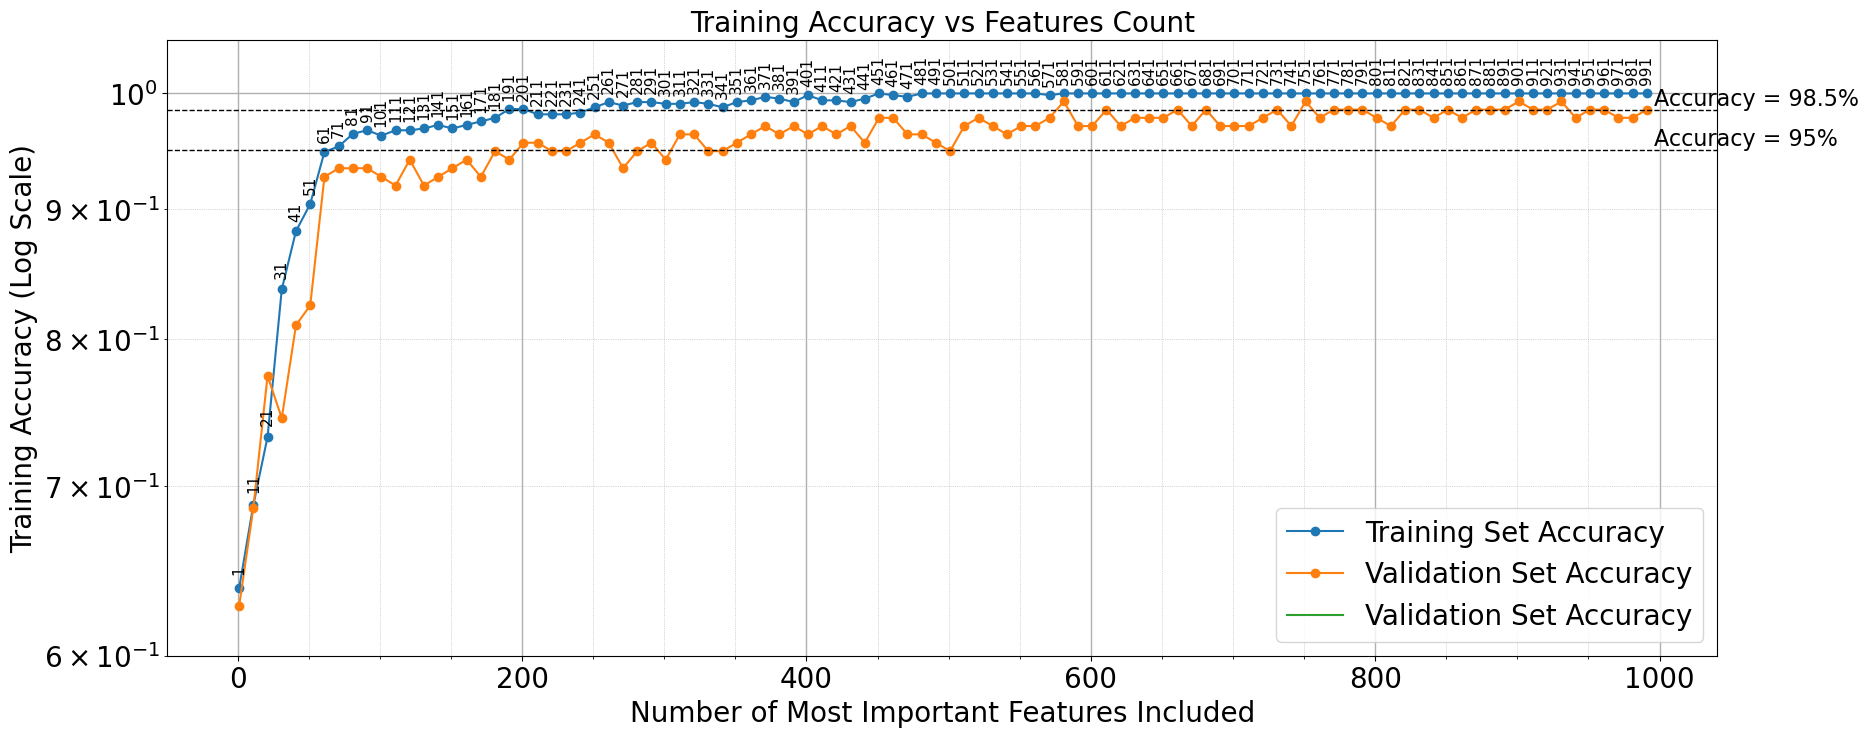

In [265]:
plt.figure(figsize=(20, 8))
plt.plot(features_range,accuracy_train_list,'-o', label ='Training Set Accuracy')
plt.plot(features_range,accuracy_val_list,'-o', 'r', label = 'Validation Set Accuracy')
plt.yscale('log')
#plt.grid()
# Set minor ticks for more granularity
plt.minorticks_on()

# Customize major and minor grid lines
plt.grid(which='major', linestyle='-', linewidth=1)
plt.grid(which='minor', linestyle=':', linewidth=0.5)
# Set the desired font size for ticks
tick_font_size = 20

# Set font size for major and minor ticks
plt.tick_params(axis='both', which='major', labelsize=tick_font_size)  # Major ticks
plt.tick_params(axis='both', which='minor', labelsize=tick_font_size)  # Minor ticks

# Set axis labels and title
plt.xlabel('Number of Most Important Features Included', fontsize=20)
plt.ylabel('Training Accuracy (Log Scale)', fontsize=20)
plt.legend(loc = 'lower right', fontsize= 20)
plt.title('Training Accuracy vs Features Count', fontsize=20)

# Set y_limits
plt.ylim(0.6,1.05)
# Add horizontal lines
plt.axhline(0.95, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=0.95
plt.text(features_range[-1]+5, 0.95, 'Accuracy = 95%', fontsize=16, color='k', va='bottom')

plt.axhline(0.985, color='k', linestyle='--', linewidth=1)  # Add a horizontal line at y=0.95
plt.text(features_range[-1]+5, 0.985, 'Accuracy = 98.5%', fontsize=16, color='k', va='bottom')

# Annotate the x-values next to each point
for x, y in zip(features_range, accuracy_train_list):
    plt.text(x, y+0.008, f'{x}', fontsize=11, ha='center', va='bottom', rotation=90)
    
# Save the plot
plt.savefig('Figures/Model_Reduction_22.png', format='png', dpi=300, bbox_inches='tight')  # Adjust dpi and bbox_inches as needed


# Saving the chromosome 22 model for use in other notebooks and for combining with other models

Exporting a trained machine learning model for use in other Python notebooks or as an executable can be done using various libraries. Below are some common methods to achieve this, along with brief explanations of how to implement each approach.

1. Using Joblib
Joblib is a popular library for saving and loading Python objects, especially for large NumPy arrays that are common in machine learning models.

Exporting:
python
Copy
from sklearn.externals import joblib  # For older versions of scikit-learn
## from joblib import dump, load  # For newer versions of joblib

# Assuming `model` is your trained machine learning model
joblib.dump(model, 'model_filename.pkl')
Importing:
python
Copy
## Load the model in another notebook or script
model = joblib.load('model_filename.pkl')
2. Using Pickle
Pickle is another Python library for serializing and deserializing Python objects.

Exporting:
python
Copy
import pickle

## Save the trained model to a file
with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)
Importing:
python
Copy
## Load the model in another notebook or script
with open('model_filename.pkl', 'rb') as file:
    model = pickle.load(file)
3. Using ONNX for Cross-Platform Compatibility
ONNX (Open Neural Network Exchange) allows you to export models between various frameworks (like TensorFlow, PyTorch, and Scikit-learn).

Exporting:
python
Copy
import onnx
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from skl2onnx import convert_sklearn

## Assuming `model` is your trained model
onnx_model = convert_sklearn(model, initial_types=[('input', FloatTensorType([None, n_features]))])
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
Importing:
You can load the ONNX model using libraries like ONNX Runtime or other compatible frameworks.

python
Copy
import onnxruntime as rt

sess = rt.InferenceSession("model.onnx")
4. Using TensorFlow Saved Model (if applicable)
If your model is built with TensorFlow or Keras, you can save it in the TensorFlow SavedModel format.

Exporting:
python
Copy
model.save('path_to_my_model_directory')  # Saves the model in SavedModel format
Importing:
python
Copy
from tensorflow import keras

## Load the model
model = keras.models.load_model('path_to_my_model_directory')
5. Creating a Python Executable with PyInstaller
If you want to run your model in an executable format, you can use PyInstaller to create standalone executables from Python scripts.

Steps:
Write a script to load your model and make predictions.
Install PyInstaller via pip:
bash
Copy
pip install pyinstaller
Use PyInstaller to create an executable:
bash
Copy
pyinstaller --onefile your_script.py
Summary
Joblib and Pickle are most commonly used for simple model serialization in Python.
ONNX is useful for sharing models across different programming frameworks.
TensorFlow Saved Model is the way to go for models built in TensorFlow.
PyInstaller enables you to make a Python script into an executable application.
The right choice depends on your specific use case, including deployment, framework compatibility, and the need for efficiency in saving and loading models.

In [ ]:
# 1. Using Joblib

from sklearn.externals import joblib  # For older versions of scikit-learn
# from joblib import dump, load  # For newer versions of joblib

# Assuming `model` is your trained machine learning model
joblib.dump(model, 'model_filename.pkl')

# Load the model in another notebook or script
model = joblib.load('model_filename.pkl')

#2. Using Pickle
Pickle is another Python library for serializing and deserializing Python objects.

import pickle

# Save the trained model to a file
with open('model_filename.pkl', 'wb') as file:
    pickle.dump(model, file)

# Load the model in another notebook or script
with open('model_filename.pkl', 'rb') as file:
    model = pickle.load(file)
# 3. Using ONNX for Cross-Platform Compatibility
import onnx
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from skl2onnx import convert_sklearn

# Assuming `model` is your trained model
onnx_model = convert_sklearn(model, initial_types=[('input', FloatTensorType([None, n_features]))])
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

import onnxruntime as rt

sess = rt.InferenceSession("model.onnx")

#4. Using TensorFlow Saved Model (if applicable)
model.save('path_to_my_model_directory')  # Saves the model in SavedModel format

from tensorflow import keras

# Load the model
model = keras.models.load_model('path_to_my_model_directory')

# 5. Creating a Python Executable with PyInstaller
pip install pyinstaller

#Use PyInstaller to create an executable:
pyinstaller --onefile your_script.py